# Исследование рынка российского кинопроката

**Заказчик исследования** — Министерство культуры Российской Федерации.  

Необходимо изучить рынок российского кинопроката и выявить текущие тренды, в том числе относительно фильмов, которые получили государственную поддержку. Предстоит определить, насколько такие фильмы интересны зрителю.
Исходные данные для исследования - данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

**Описание данных.**  
Исходные данные содержатся в двух файлах:
- mkrf_movies.csv — данные о прокатных удостоверениях;
- mkrf_shows.csv — данные о прокате в российских кинотеатрах.

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.  
В таблице представлены следующие данные:

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
В таблице представлены следующие данные:

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Содержание исследования:  
1. [Сведение исходных таблиц в одну и общий ее анализ](#open_file)  
 1.1. [Импорт библиотек](#import)  
 1.2. [Чтение исходных файлов в соответствующие датафреймы](#read)  
 1.3. [Общая информация об исходных таблицах](#info_all)  
 1.4. [Объединение таблиц](#union)  
 1.5. [Общая информация об объединенной таблице "df"](#info_df)  
    * [Вывод](#final_1)  
    
    
2. [Предобработка данных](#data_preprocessing)  

 2.1. [Обработка пропусков](#processing_nan)  
    * [Обработка пропусков в "film_studio"](#film_studio)  
    * [Обработка пропусков в "production_country"](#production_country)  
    * [Обработка пропусков в "refundable_support", "nonrefundable_support" и "budget"](#budget)  

 2.2. [Оптимизация типов данных](#change_type)  
    * [Оптимизация типа категориальных значений](#category_type)  
    * [Оптимизация типа значений "ratings"](#ratings) 
    

 2.3. [Обработка дубликатов](#duplicates)  
    * [Обработка дубликатов в "title"](#double_title)  
    * [Обработка дубликатов в "puNumber"](#double_puNumber)  
    
 2.4. [Обработка категориальных значений](#category)  
 2.5. [Обработка количественных значений](#number)  
 2.6. [Расчет дополнительных параметров](#additional)  
    * [Год премьеры фильма](#year_premier)  
    * [Режиссёр и жанр](#director_genre)  
    * [Доля государственной поддержки в бюджете фильма](#gos_percent)  
    * [Вывод](#final_2)  
    
    
3. [Исследовательский анализ данных](#analysis)  
 3.1. [Анализ кинорынка по ежегодному количеству премьер](#premiere)  
    * [Количество премьер по годам](#year_premiere)  
    * [Количество премьер по возрастным категориям](#premiere_age)  
    * [Количество премьер по жанрам](#premiere_genre)  
    
 3.2. [Анализ кинорынка по ежегодному количеству сборов](#fees)  
    * [Сборы в абсолютном исчислении по годам](#year_fees)  
    * [Медиана и среднее значение сборов по годам](#year_mean_fees)   
    
 3.3. [Анализ зависимости сборов от возрастной категории](#age)  
 3.4. [Исследование фильмов, которые получили государственную поддержку](#gos)  
    * [Корреляция госфинансирования с основными параметрами](#corr)  
    * [Распределение возвратного и невозвратного госфинансирования по годам](#back_finance)  
    * [Доля госсредств в бюджетах фильмов по годам](#budget_year)  
    * [Доля госсредств в бюджетах фильмов по жанрам](#budget_genres)  
    * [Доля госсредств в бюджетах фильмов по возрастной категории](#budget_age)  
    * [Анализ источника финансирования по годам](#finance)  
    * [Анализ источника финансирования по жанрам](#finance_genre)  
    * [Вывод](#final_3)  
    
    
4. [Общий вывод](#final)  

## Сведение исходных таблиц в одну и общий ее анализ
<a id="open_file"></a>

### Импорт библиотек
<a id="import"></a>

In [1]:
import pandas as pd                      # импорт библиотеки pandas
import matplotlib.pyplot as plt          # импорт библиотеки matplotlib
import seaborn as sns                    # импорт библиотеки seaborn
import datetime                          # импорт библиотеки datetime
import re                                # импорт библиотеки re

### Чтение исходных файлов в соответствующие датафреймы
<a id="read"></a>

In [2]:
try:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')         # чтение файла mkrf_movies.csv в датафрейм df_movies
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')           # чтение файла mkrf_shows.csv в датафрейм df_shows
except:
    df_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

### Общая информация об исходных таблицах
<a id="info_all"></a>

Выводим общую информацию о таблице "df_movies":

In [3]:
df_movies.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Выводим общую информацию о таблице "df_shows":

In [4]:
df_shows.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


### Объединение таблиц
<a id="union"></a>

Необходимо объединить таблицы по общим столбцам "puNumber" (номер прокатного удостоверения). Однако в таблицах данные "puNumber" имеют разный тип: "df_movies" - "object", "df_shows" - "int64". Вероятно, в данных "puNumber" помимо числовых, содержатся текстовые значения.  
Находим фильмы, в номере прокатных удостоверений которых встречаются буквенные символы:

In [5]:
df_movies.loc[~df_movies['puNumber'].str.strip().str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В исходных данных не был указан номер прокатного удостоверения для фильма "Курбан-роман. (История с жертвой)". В реестре прокатных удостоверений данный фильм имеет удостоверение № 111009614.  
Исправляем значение в таблице:

In [6]:
df_movies.loc[df_movies['title'] == 'Курбан-роман. (История с жертвой)', 'puNumber'] = 111009614

Проверяем изменения:

In [7]:
df_movies.loc[df_movies['title'] == 'Курбан-роман. (История с жертвой)']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Изменение внесено.

Номера прокатных удостоверений согласно реестру - целые, положительные, девятизначные числа. Целесообразно и в исходных таблицах привести данные значения к целочисленным. Поскольку тип "uint" при том же размере дает больший диапазон положительных значений, чем "int", заменяем тип значений "puNumber" в таблицах "df_movies" и "df_shows" на "uint32":

In [8]:
df_movies['puNumber'] = df_movies['puNumber'].astype('uint32')
df_shows['puNumber'] = df_shows['puNumber'].astype('uint32')

Объединяем таблицы по столбцу "puNumber":

In [9]:
df = df_movies.merge(df_shows, on='puNumber', how='outer')

Выводим случайные 5 строк таблицы "df":

In [10]:
df.sample(n=5, random_state=5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6040,Убежище дьявола,121015018,2018-07-26T12:00:00.000Z,Художественный,"Би Эйч 5, Пургаторио, Собрас Интернэшнл Пикчерз",Мексика - Чили,Гильермо Амоедо,"Родриго Бело, Джакобо Назар, Виктор Хьюго Пуйо...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,ужасы,20325794.01
2964,Кольца мира,112000416,2016-05-26T12:00:00.000Z,Документальный,"АНО Студия ""Остров""",Россия,С.Мирошниченко,"АНО Студия ""Остров"", Государственная телевизио...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.1,документальный,869148.00
5392,Ключ саламандры,111002311,2011-03-22T12:00:00.000Z,Художественный,"ООО ""Студия ""Арсенал-ТВ""",Россия,А.Якимчук,"К.Ветрова, С.Матвиенко, В.Финкельштейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.8,"боевик,приключения",NaN
3572,Моя большая греческая свадьба 2,121030516,2016-11-15T12:00:00.000Z,Художественный,"Гоулд Секл Филмз, Аш Би Оу Филмз, Юниверсал Пи...",Канада - США,Кирк Джонс,"Гари Гоэцман, Том Хэнкс, Рита Уилсон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"мелодрама,комедия",1538127.69
2593,Демоны Деборы Логан,121009315,2015-04-27T12:00:00.000Z,Художественный,"Бэд Хэт Нэрри Продакшнз, Касаделик Пикчерз, Дж...",США,Адам Робител,"Джефф Райс, Брайан Сингер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.2,"ужасы,триллер,детектив",9578673.00


Проверяем, нет ли потерь данных:

In [11]:
if (df.shape[0] - df_movies.shape[0]) == 0:
    print('Потерь данных нет')
else:
    print('Из датафрейма удалено {} строк'.format(df.shape[0] - df_movies.shape[0]))

Потерь данных нет


### Общая информация об объединенной таблице "df"
<a id="info_df"></a>

Выводим общую информацию об объединенной таблице:

In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   uint32 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Выводим описательную статистику для строковых значений объединённой таблицы "df":

In [13]:
df.describe(include='object').T

,count,unique,top,freq
title,7486,6772,День святого Валентина_,5
show_start_date,7486,1965,2010-12-17T12:00:00.000Z,96
type,7486,8,Художественный,4520
film_studio,7468,5490,"Киностудия ""Мосфильм""",341
production_country,7484,950,США,2172
director,7477,4811,О.Семёнова,47
producer,6918,5349,П.Смирнов,67
age_restriction,7486,5,«16+» - для детей старше 16 лет,2851
financing_source,332,3,Министерство культуры,164
ratings,6519,94,6.6,312


Выводим описательную статистику для числовых значений таблицы "df":

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,7486.0,1.351934e+08,3.835138e+07,1811096.0,112025043.0,121015464.5,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.0,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,30000000.0,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,68649916.0,1.419853e+08,2.305074e+09
box_office,3159.0,7.645449e+07,2.403189e+08,0.0,85671.5,2325871.1,2.397622e+07,3.073569e+09


Определяем количество пропущенных значений в каждом столбце:

In [15]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4327
dtype: int64

Определяем процент пропущенных значений в каждом столбце:

In [16]:
df.isna().mean()*100

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
box_office               57.801229
dtype: float64

Выводим случайные 5 строк таблицы "df":

In [17]:
df.sample(n=5, random_state=1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6107,Голубая игуана,121016818,2018-08-23T12:00:00.000Z,Художественный,ЮКей Филм Студио Продакшнз,Великобритания,Хади Хаджэйг,"Ян Ковентри, Том Лассалли, Хади Хаджэйг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"боевик,триллер,мелодрама",2125748.85
3619,Искусственный интеллект. Доступ неограничен,121025616,2016-09-21T12:00:00.000Z,Художественный,"Волтэдж Пикчерз, Фэстнет Филмз, 22 Эйч 22, Ска...",США-Франция-Ирландия,Джон Мур,"Крэйг Дж. Флорес, Дэвид Т.Френдли, Бо Ст.Клэр",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.2,"триллер,драма,криминал",7039371.17
4250,Вампирский засос,121014910,2010-08-28T12:00:00.000Z,Художественный,"ХХ век Фокс, Ридженси Энтерпрайзис, Роад Рибел",США,"Аарон Зельцер, Джейсон Фридберг","Джерри П.Джейкобс, Питер Сафран",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.1,"ужасы,комедия,семейный",NaN
420,Все любят китов,121001212,2012-01-23T12:00:00.000Z,Художественный,"Юниверсал Пикчерс, Энонимас Контент, Уоркинг Т...",США,Кен Коупис,"Тим Бивен, Лайза Чейзин, Эрик Феллнер, Стив Го...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"драма,мелодрама,семейный",NaN
2787,МУЛЬТ в кино. Выпуск № 8,114001215,2015-06-24T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница"", ОО...",Россия-Кипр,"В.Мухаметзянов, В.Пономарёв, А.Миронов, Е.Салабай","М.Мэннис, А.Златопольский, С.Сельянов, А.Боярс...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,1455524.90


***Вывод***
<a id="final_1"></a>
Исходные таблицы объединены в одну. Для этого исправлено одно значение "puNumber", а тип данного столбца изменен на "uint32".  
В объединенной таблице выявлены следующие особенности:  
1. В таблице 7486 строк и 16 столбцов. Данные имеют типы "float64" и "object". Таблица имеет объем 8.9 MB.
2. В столбце "type" всего 8 уникальных значений, которые имеют тир "object". В целях экономии ресурсов целесообразно заменить тип на "category".
3. В столбце "film_studio" 18 пропусков. Маловероятно, что прокатное удостоверение было выдано без указания студии производителя. С высокой долей вероятности, пропуски являются следствием технического сбоя при внесении данных в реестр прокатных удостоверений или выгрузке данных.
4. В столбце "production_country" 2 пропуска. Маловероятно, что прокатное удостоверение было выдано без указания студии производителя. С высокой долей вероятности, пропуски являются следствием технического сбоя при внесении данных в реестр прокатных удостоверений или выгрузке данных.
5. В столбце "director" 9 пропусков. Маловероятно, что прокатное удостоверение было выдано без указания студии производителя. С высокой долей вероятности, пропуски являются следствием технического сбоя при внесении данных в реестр прокатных удостоверений или выгрузке данных.
6. В столбце "producer" 568 пропусков. Маловероятно, что прокатное удостоверение было выдано без указания студии производителя. С высокой долей вероятности, пропуски являются следствием технического сбоя при внесении данных в реестр прокатных удостоверений или выгрузке данных.
7. В столбцах "refundable_support", "nonrefundable_support", "budget" и "financing_source" 7154 пропусков. Значения указаны только для фильмов, имеющих государственную поддержку.
8. В столбце "ratings" 967 пропусков. Рейтинг - показатель динамический. Вероятно, на момент формирования отчета прокатными организациями не была предоставлена актуальная информация.
9. В столбце "genres" 976 пропусков. Маловероятно, что прокатное удостоверение было выдано без указания студии производителя. С высокой долей вероятности, пропуски являются следствием технического сбоя при внесении данных в реестр прокатных удостоверений или выгрузке данных.
10. В столбце "box_office" 4328 пропусков. Сборы - показатель динамический. Вероятно, на момент формирования отчета прокатными организациями не была предоставлена актуальная информация.
11. В столбце "production_country" всего 950 уникальных значений, которые имеют тир "object". В целях экономии ресурсов целесообразно заменить тип на "category".
12. В столбце "age_restriction" всего 5 уникальных значений, которые имеют тир "object". В целях экономии ресурсов целесообразно заменить тип на "category".
13. В столбце "financing_source" всего 3 уникальных значений, которые имеют тир "object". В целях экономии ресурсов целесообразно заменить тип на "category".
14. В столбце "genres" всего 742 уникальных значений, которые имеют тир "object". В целях экономии ресурсов целесообразно заменить тип на "category".
15. Медиана "refundable_support", равна 0.

## Предобработка данных
<a id="data_preprocessing"></a>

### Обработка пропусков
<a id="processing_nan"></a>

Во многих столбцах таблицы присутствуют пропуски.  
Пропуски в данных "refundable_support", "nonrefundable_support", "budget", "financing_source" обоснованы отсутствием государственного финансирования соответствующих фильмов. Целесообразно в столбце "financing_source" оставить пропуски, в остальных заменить на "0".   
В виду небольшого количества пропусков в "film_studio" заполним их значениями из реестра прокатных удостоверений, если таковые имеются.  
В виду большого количества пропусков "producer", "ratings", "genres", "box_office" и невозможности выявить из других параметров таблицы их значения, оставляем их без изменения.

***Обработка пропусков в "production_country"***
<a id=production_country></a>

Ищем произведения, для которых не указана страна-производитель:

In [18]:
df.loc[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Из реестра прокатных удостоверений следует, что страна производитель данных продуктов - Россия. Вероятно, пропуски возникли в результате технического сбоя при выгрузке данных.  
Заполняем пропуски:

In [19]:
df.loc[df['production_country'].isna(), 'production_country'] = 'Россия'

***Обработка пропусков в "refundable_support", "nonrefundable_support" и "budget"***
<a id=budget></a>

Заполняем пропуски в соответствующих столбцах значением 0:

In [20]:
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['budget'] = df['budget'].fillna(0)

**Обработка пропусков в "film_studio", "director", "producer", "genres"**

Заменяем пропуски на значение "Не известен":

In [21]:
df.loc[df['film_studio'].isna(), 'film_studio'] = 'Неизвестен'
df.loc[df['director'].isna(), 'director'] = 'Неизвестен'
df.loc[df['producer'].isna(), 'producer'] = 'Неизвестен'
df.loc[df['genres'].isna(), 'genres'] = 'Неизвестен'

### Оптимизация типов данных
<a id="change_type"></a>

В таблице присутствуют категориальные значения, имеющие тип "object". При количестве уникальных значений менее 50% процентов в целях экономии ресурсов целесообразно изменить их тип на "category".  

***Оптимизация типа категориальных значений***
<a id=" category_type"></a>

Создаем список столбцов, данные которых можно преобразовать к типу "category":

In [22]:
category_list = ['title', 'type', 'film_studio', 'production_country', 'director',
                 'producer', 'age_restriction', 'financing_source', 'genres']

Переводим значения текстовых полей в нижний регистр

In [23]:
for i in category_list:
    df[i] = df[i].str.lower()

В столбцах присуствует разная или неправильная запись одних и тех же данных,они производят много дублирующихся по смылу ненужных категорий. Пройдем новым циклом по данных, в нем убрем лишние пробелы из них.

In [24]:
for column in category_list:
    df[column] = df[column].str.strip()

Вычисляем процент уникальных значений в каждом столбце от общего количества:

In [25]:
for i in category_list:
    print('Процент уникальных значений {} от общего количества = {:0.1%}'
          .format(i, len(df[i].unique()) / len(df)))

Процент уникальных значений title от общего количества = 90.3%
Процент уникальных значений type от общего количества = 0.1%
Процент уникальных значений film_studio от общего количества = 72.4%
Процент уникальных значений production_country от общего количества = 12.5%
Процент уникальных значений director от общего количества = 64.1%
Процент уникальных значений producer от общего количества = 71.2%
Процент уникальных значений age_restriction от общего количества = 0.1%
Процент уникальных значений financing_source от общего количества = 0.1%
Процент уникальных значений genres от общего количества = 9.9%


Для экономии ресурсов назначаем тип "categoty" тем параметрам, количество уникальных значений которых не превышает 50% от общего числа: "type", "production_country", "age_restriction", "financing_source" и "genres":

In [26]:
df = df.astype({'type': 'category', 'production_country': 'category', 'age_restriction': 'category', 
           'financing_source': 'category', 'genres' : 'category'})

**преобразуем тип поля "show_start_date"**

In [27]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

Тип изменен, объем таблицы уменьшен на 38% (с 8,9 до 5,6 MB).

***Оптимизация типа значений "ratings"***
<a id=" ratings"></a>

Выводим уникальные значения "ratings":

In [28]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Среди значений присутствуют оценки как по десятибалльной системе, так и по стобалльной - проценты.  
Переводим проценты в десятичную систему оценок и изменяем тип значений на "float64":

In [29]:
df.loc[df['ratings'].notna() & df['ratings'].str.contains('%'), 'ratings'] =\
df['ratings'].str.replace('%', '').astype('float64') / 10
df['ratings'] = df['ratings'].astype('float64')

Выводим уникальные значения "ratings":

In [30]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбце остались только вещественные значения и пропуски.

Выводим общую информацию о таблице:

In [31]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   uint32             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   category           
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

Тип изменен.

### Обработка дубликатов
<a id="duplicates"></a>

**Проверка на полные дубликаты**

In [32]:
df.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверка на полные дубликаты.</div>

Полные дубликаты отсутствуют.

В таблице присутствуют данные, дублирование которых требует исследования - "title", 	"puNumber".

***Обработка дубликатов в "title"***
<a id=double_title></a>

Проверяем столбец "title" на наличие дубликатов:

In [33]:
df['title'].duplicated().sum()

724

В таблице присутствуют 714 дубликатов.  
Выводим количество уникальных значений title:

In [34]:
df.groupby('title')['puNumber'].count().sort_values(ascending=False)

title
день святого валентина_                           5
химера                                            4
красавчик-2                                       4
жена путешественника во времени                   4
рапунцель: запутанная история                     4
                                                 ..
история золушки                                   1
история дельфина                                  1
историки об истории или слово о поле куликовом    1
истории призраков                                 1
ёлки последние                                    1
Name: puNumber, Length: 6762, dtype: int64

Изучаем дублирование на примере фильма "День святого Валентина_": он упоминается 5 раз.  
Изучаем данные о нем подробней:

In [35]:
df.loc[df['title'] == 'День святого Валентина_']          # выводим строки с фильмом 'День святого Валентина_'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Данные строки отличаются только датой премьеры и номером прокатного удостоверения. По данным реестра прокатных удостоверений, удостоверения выданы на:
- Театральный (неисключительные права) - 121002210;
- Домашнее видео - DVD, Blu-Ray - 221136210;
- DVD-домашнее видео - 221066410;
- Кабельное телевидение в гостиницах, неисключительные права - 221083810, 221068010.

Все дубликаты необходимы для исследования. Оставляем столбец без изменений.

***Обработка дубликатов в "puNumber"***
<a id="double_puNumber"></a>

Проверяем на наличие дубликатов:

In [36]:
df.groupby('puNumber')['title'].count().sort_values(ascending=False)

puNumber
111009614    2
221054410    2
221154310    2
121029216    1
121029412    1
            ..
121002914    1
121002913    1
121002912    1
121002911    1
231001111    1
Name: title, Length: 7483, dtype: int64

Присутствуют две пары дубликатов.
Выводим их:

In [37]:
df.loc[(df['puNumber'] == 221154310) | (df['puNumber'] == 221054410)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.0,"мелодрама,комедия",NaN
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.6,"драма,мелодрама,история",NaN
5067,анализируй это!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.4,"комедия,криминал",NaN
5068,анализируй то!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,6.8,"комедия,криминал",NaN


Дубликаты соответствуют реестру прокатных удостоверений. Оставляем их без изменений.

### Обработка категориальных значений
<a id="category"></a>

Создаем список категориальных параметров:

In [38]:
category_list = ['type', 'director', 'producer', 'production_country', 'age_restriction', 'financing_source', 'genres']

Определяем количество уникальных категориальных значений в таблице:

In [39]:
for i in category_list:
    print(df.groupby(i)['title'].count().sort_values(ascending=False))
    print('____________________________________________')

type
художественный                5909
анимационный                   829
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: title, dtype: int64
____________________________________________
director
о.семёнова                   60
д.червяцов                   17
стивен содерберг             17
ридли скотт                  16
тиль швайгер                 14
                             ..
е.захаров, а.соснов           1
е.звездаков                   1
е.зильберштейн, а.дудоров     1
е.кашинцева                   1
ён сан-хо                     1
Name: title, Length: 4797, dtype: int64
____________________________________________
producer
неизвестен                                                           568
п.смирнов                                                             67
олег кузовков, дмитрий ловейко, марина ратина                         28
с.сельянов                              

### Обработка количественных значений
<a id="number"></a>

Бюджет состоит как из частных средств, так и выделенных из специализированных государственных фондов. Поэтому бюджет не может быть меньше выделенных государством средств, то есть суммы "refundable_support" и "nonrefundable_support".
Проверяем, сколько фильмов не удовлетворяет этому условию:

In [40]:
print('Количество строк с некорректным значением "budget" = {}'
      .format(df.loc[(df['refundable_support'] + df['nonrefundable_support']) > df['budget'], 'title'].count()))

Количество строк с некорректным значением "budget" = 17


Заменяем некорректные значения "budget" на сумму "refundable_support" и "nonrefundable_support".

In [41]:
df.loc[(df['refundable_support'] + df['nonrefundable_support']) > df['budget'], 'budget'] =\
df['refundable_support'] + df['nonrefundable_support']

Проверяем:

In [42]:
print('Количество строк с некорректным значением "budget" = {}'
      .format(df.loc[(df['refundable_support'] + df['nonrefundable_support']) > df['budget'], 'title'].count()))

Количество строк с некорректным значением "budget" = 0


Значения "budget" откорректированы.

### Расчет дополнительных параметров
<a id="additional"></a>

***Год премьеры фильма***
<a id=year_premier></a>

Создаем столбец "year", в который заносим год премьеры фильма:

In [43]:
df['year'] = pd.to_datetime(df['show_start_date'], format='%Y.%m.%dT%H:%M:%S').dt.strftime('%Y').astype('uint16')

Выводим первые 5 строк таблицы:

In [44]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,неизвестен,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,2016
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


***Режиссёр и жанр***
<a id=director_genre></a>

Создаем два столбца: с именем и фамилией главного режиссёра ("one_director") и основным жанром ("one_genres") фильма. В столбцы входят первые значения из списка режиссёров и жанров соответственно.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   uint32             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   category           
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

In [46]:
df['one_director'] = df['director'].apply(lambda names: str(names).strip().split(',')[0])
df['one_producer'] = df['producer'].apply(lambda names: str(names).strip().split(',')[0])
df['one_genres'] = df['genres'].apply(lambda names: str(names).strip().split(',')[0]).astype('category')

Выводим случайные 5 строк таблицы:

In [47]:
df.sample(n=5, random_state=1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,one_director,one_producer,one_genres
6107,голубая игуана,121016818,2018-08-23 12:00:00+00:00,художественный,юкей филм студио продакшнз,великобритания,хади хаджэйг,"ян ковентри, том лассалли, хади хаджэйг",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.7,"боевик,триллер,мелодрама",2125748.85,2018,хади хаджэйг,ян ковентри,боевик
3619,искусственный интеллект. доступ неограничен,121025616,2016-09-21 12:00:00+00:00,художественный,"волтэдж пикчерз, фэстнет филмз, 22 эйч 22, ска...",сша-франция-ирландия,джон мур,"крэйг дж. флорес, дэвид т.френдли, бо ст.клэр",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.2,"триллер,драма,криминал",7039371.17,2016,джон мур,крэйг дж. флорес,триллер
4250,вампирский засос,121014910,2010-08-28 12:00:00+00:00,художественный,"хх век фокс, ридженси энтерпрайзис, роад рибел",сша,"аарон зельцер, джейсон фридберг","джерри п.джейкобс, питер сафран",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,4.1,"ужасы,комедия,семейный",NaN,2010,аарон зельцер,джерри п.джейкобс,ужасы
420,все любят китов,121001212,2012-01-23 12:00:00+00:00,художественный,"юниверсал пикчерс, энонимас контент, уоркинг т...",сша,кен коупис,"тим бивен, лайза чейзин, эрик феллнер, стив го...",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,7.2,"драма,мелодрама,семейный",NaN,2012,кен коупис,тим бивен,драма
2787,мульт в кино. выпуск № 8,114001215,2015-06-24 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница"", оо...",россия-кипр,"в.мухаметзянов, в.пономарёв, а.миронов, е.салабай","м.мэннис, а.златопольский, с.сельянов, а.боярс...",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,NaN,неизвестен,1455524.90,2015,в.мухаметзянов,м.мэннис,неизвестен


Столбцы "one_director" и "one_genres" добавлены.

***Доля государственной поддержки в бюджете фильма***
<a id=gos_percent></a>

Добавляем в таблицу столбец "gos_financing", в которой указываем долю государственной поддержкой в бюджете фильма:

In [48]:
df['gos_financing'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

Для проверки выводим пять строк с добавленными значениями:

In [49]:
df.loc[df['gos_financing'].notna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,one_director,one_producer,one_genres,gos_financing
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,министерство культуры,8.1,"драма,мелодрама",365353.6,2013,а.атанесян,а.атанесян,драма,0.333703
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,министерство культуры,NaN,неизвестен,28140.0,2014,а.якимчук,а.тютрюмов,неизвестен,0.700000
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,фонд кино,5.3,"комедия,фантастика",19957031.5,2013,р.давлетьяров,р.давлетьяров,комедия,0.612691
1524,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,министерство культуры,4.2,драма,55917.5,2014,е.миндадзе (псевдоним катя шагалова),л.антонова,драма,0.690095
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,министерство культуры,6.4,драма,232100.0,2014,м.угаров,а.миндадзе,драма,0.624764


In [50]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   uint32             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   category           
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

***Вывод***  
<a id=final_2></a>
Изменен тип значений "type", "production_country", "age_restriction", "financing_source" и "genres" изменен на “category”.     
Пропуски в столбцах "production_country", "refundable_support", "nonrefundable_support" и "budget" на конкретные значения.
Устранено неявное дублирование значений “type”.  
Значения “budget” приведены в соответствие с значениями "refundable_support" и "nonrefundable_support".   
В таблицу добавлены следующие параметры:
- “year” – год премьеры;
- "one_director" – режиссёр;
- "one_genres" – жанр;
- "gos_financing" - доля государственной поддержкой в бюджете фильма.

## Исследовательский анализ данных
<a id="analysis"></a>

### Анализ кинорынка по ежегодному количеству премьер
<a id="premiere"></a>

***Количество премьер по годам***
<a id="year_premiere"></a>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил про уникальность.</div>

Определяем, сколько уникальных фильмов выходило в прокат каждый год:

In [51]:
date_df = df.pivot_table(index='year', values='title', aggfunc=pd.Series.nunique)
date_df

,title
year,
2010,818
2011,557
2012,556
2013,615
2014,766
2015,688
2016,782
2017,505
2018,883


Строим диаграмму:

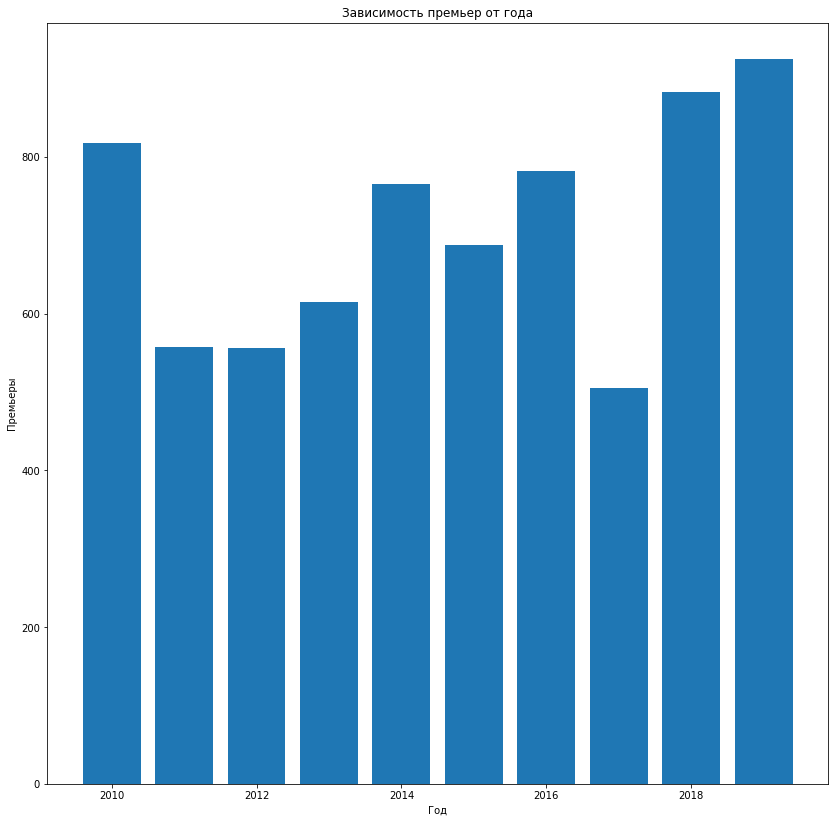

In [52]:
plt.figure(figsize=(14,14))
ax = plt.bar(date_df.index, date_df['title'])
plt.title('Зависимость премьер от года')
plt.ylabel('Премьеры')
plt.xlabel('Год')
plt.show()

В 2010 году было 818 премьер. В течение 2011 и 2012 года наблюдается снижение до 556. С 2013 года число премьер в целом растет и к 2019 году достигает максимального значения - 925. В 2017 году наблюдается провал по количеству премьер до 505.

**Доля фильмов, выходивших в прокат**

Находим долю уникальных фильмов, вышедших в прокат, и строим график:

In [53]:
box_office_year = (
    df.drop_duplicates(subset=['title'])
      .groupby('year')
      .agg({'box_office' : 'count', 'title' : 'nunique'})
      .assign(fract = lambda x: x['box_office'] / x['title'])
)

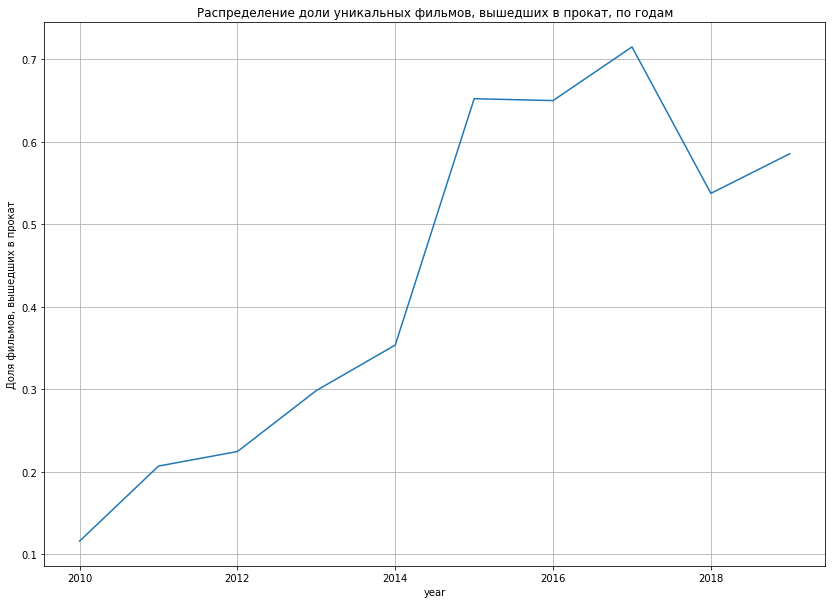

In [54]:
plt.figure(figsize=(14,10))
ax1 = box_office_year['fract'].plot(grid=True)
plt.ylabel('Доля фильмов, вышедших в прокат')
plt.title('Распределение доли уникальных фильмов, вышедших в прокат, по годам')
plt.show()

Доля фильмов, вышедших в прокат, с 2010 по 2017 увеличилась 0.11 до 0.71. В 2018 году происходит падение до 0.53.

***Количество премьер по возрастным категориям***
<a id="premiere_age"></a>

Создаем сводную таблицу распределения премьер по возрастным категориям:

In [55]:
premier_df = (
    df.pivot_table(index='age_restriction', values='title', aggfunc=pd.Series.nunique)
    .sort_values(by='title')
)
premier_df

,title
age_restriction,
«6+» - для детей старше 6 лет,608
«0+» - для любой зрительской аудитории,748
«18+» - запрещено для детей,1438
«12+» - для детей старше 12 лет,1490
«16+» - для детей старше 16 лет,2515


Строим диаграмму:

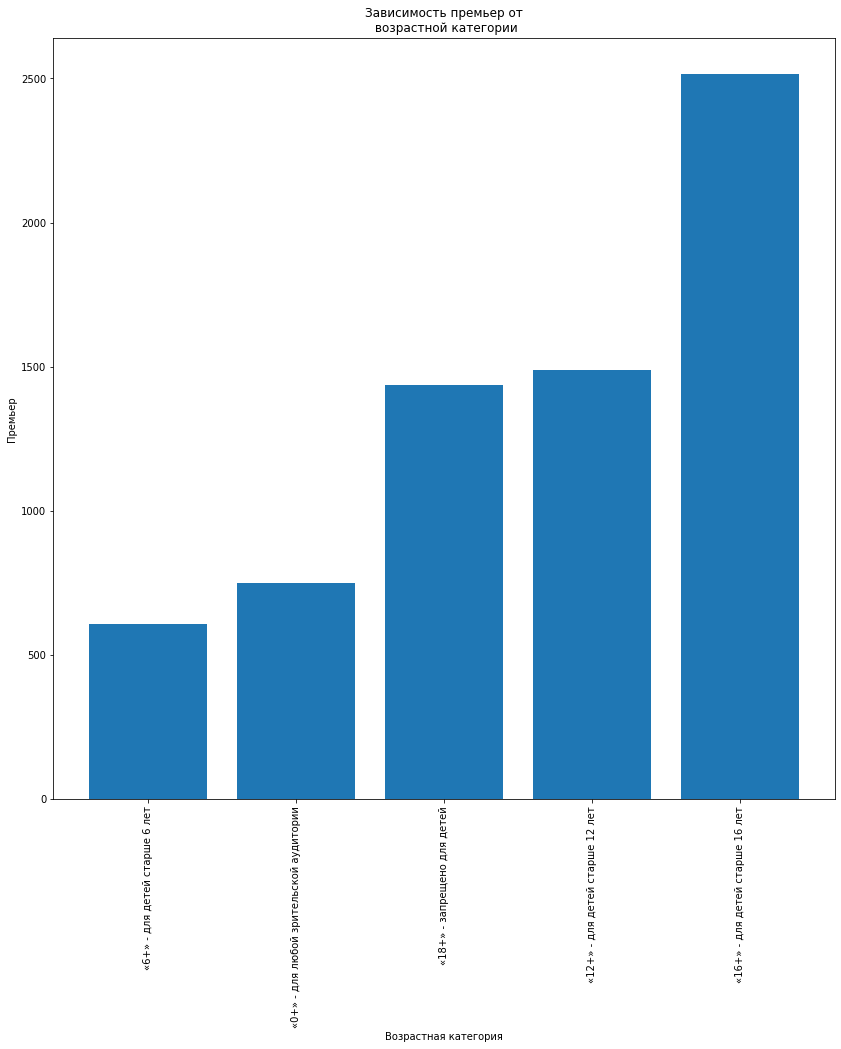

In [56]:
plt.figure(figsize=(14,14))
ax = plt.bar(premier_df.index, premier_df['title'])
plt.title('Зависимость премьер от\n возрастной категории')
plt.ylabel('Премьер')
plt.xlabel('Возрастная категория')
plt.xticks(rotation=90)
plt.show()

Наибольшее число премьер приходится на возрастную категорию "16+" - 2517.  
Меньше - на категории "12+" и "18+" - 1490 и 1438 соответственно.  
Минимальное число - на категории "0+" и "6+" - 749 и 608 соответственно.

***Количество премьер по жанрам***
<a id="premiere_genre"></a>

Создаем сводную таблицу распределения премьер по жанрам:

In [57]:
premier_genre_df = (
    df.pivot_table(index='one_genres', values='title', aggfunc=pd.Series.nunique)
    .sort_values(by='title')
)
premier_genre_df


,title
one_genres,
фильм-нуар,1
реальное тв,1
для взрослых,2
музыка,7
вестерн,7
спорт,9
концерт,11
короткометражка,13
история,22


Строим диаграмму:

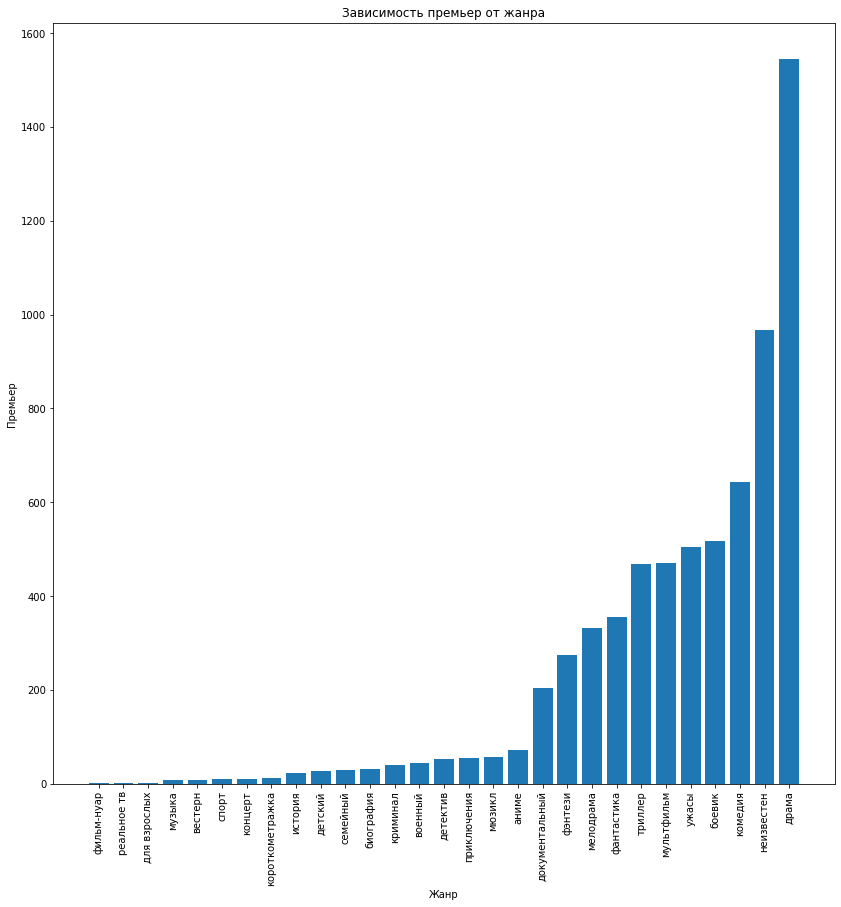

In [58]:
plt.figure(figsize=(14,14))
ax = plt.bar(premier_genre_df.index, premier_genre_df['title'])
plt.title('Зависимость премьер от жанра')
plt.ylabel('Премьер')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.show()

Наибольшее число премьер приходится на жанр "Драма" - 1548.  
Несколько меньше: комедия (644), боевик (518), ужасы (505), мультфильм (472), триллер (470), фантастика (356), мелодрама (332), фэнтези (277), документальный (204).  
Количество премьер других жанров минимально и не превышает 71.

### Анализ кинорынка по ежегодному количеству сборов
<a id="fees"></a>

Для анализа сборов создаем таблицу, в которой находятся только фильмы, для которых параметр "box_office" указан.

In [59]:
box_mean_df = df.loc[df['box_office'] > 0]

***Сборы в абсолютном исчислении по годам***
<a id="year_fees"></a>

Определяем количество сборов за каждый год:

In [60]:
box_office_df = box_mean_df.pivot_table(index='year', values='box_office', aggfunc='sum')
box_office_df

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


Строим диаграмму:

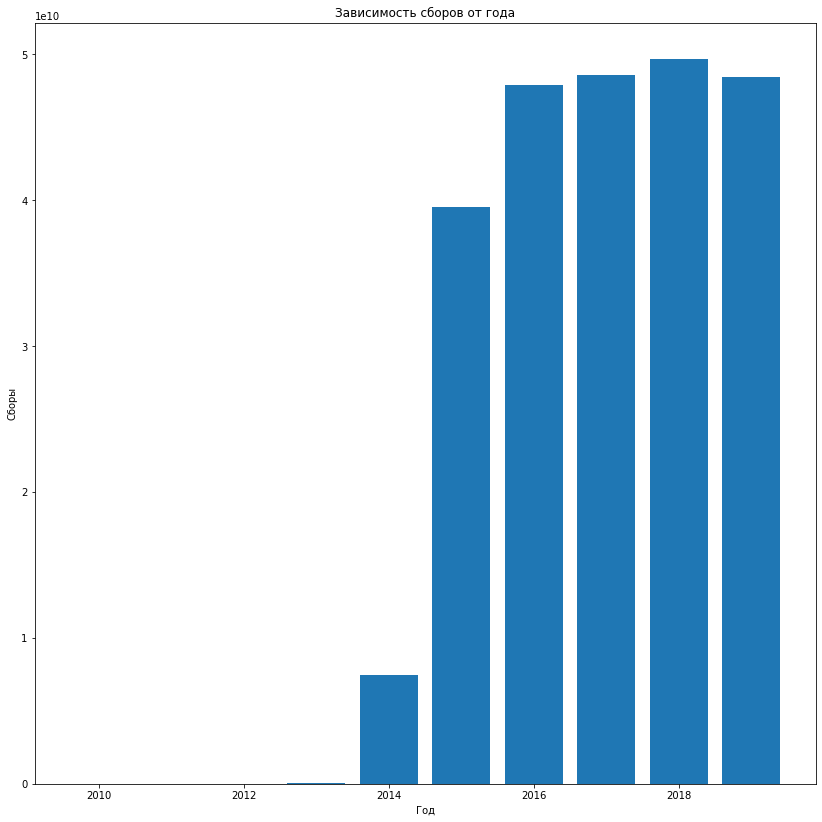

In [61]:
plt.figure(figsize=(14,14))
ax = plt.bar(box_office_df.index, box_office_df['box_office'])
plt.title('Зависимость сборов от года')
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.show()

До 2014 года общие сборы не превышали 29 млн.руб. В 2014 наблюдается резкий рост до 7,4 млрд., а в 2015 до 39 млрд. С 2016 по 2019 сборы колеблются в диапазоне 47,9-49,7 млрд. руб.  
Согласно заявлению 27.12.2013 на тот момент министра культуры Мединского В.Р. в 2013 была проведена "плавная реформа системы господдержки кинематографии", нацеленную на увеличении доли российского кино в прокате посредством увеличения госфинансирования с 2014 года.  
С 2014 по 2017 года увеличивается госфинансирование фильмов как на возвратной, так и на невозвратной основе. Как видно из [п.3.4](#corr) госфинансирование напрямую влияет на сборы фильма. Увеличение сборов позволяет студиям увеличивать количество снимаемых фильмов ([см.п.3.1](#premiere)), что приводит к росту сборов в абсолютном выражении.

***Медиана и среднее значение сборов по годам***
<a id="year_mean_fees"></a>

Находим среднее значение и медиану сборов по годам:

In [62]:
box_office_mean_df = box_mean_df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_office_mean_df.columns=['Среднее', 'Медиана']
box_office_mean_df

,Среднее,Медиана
year,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


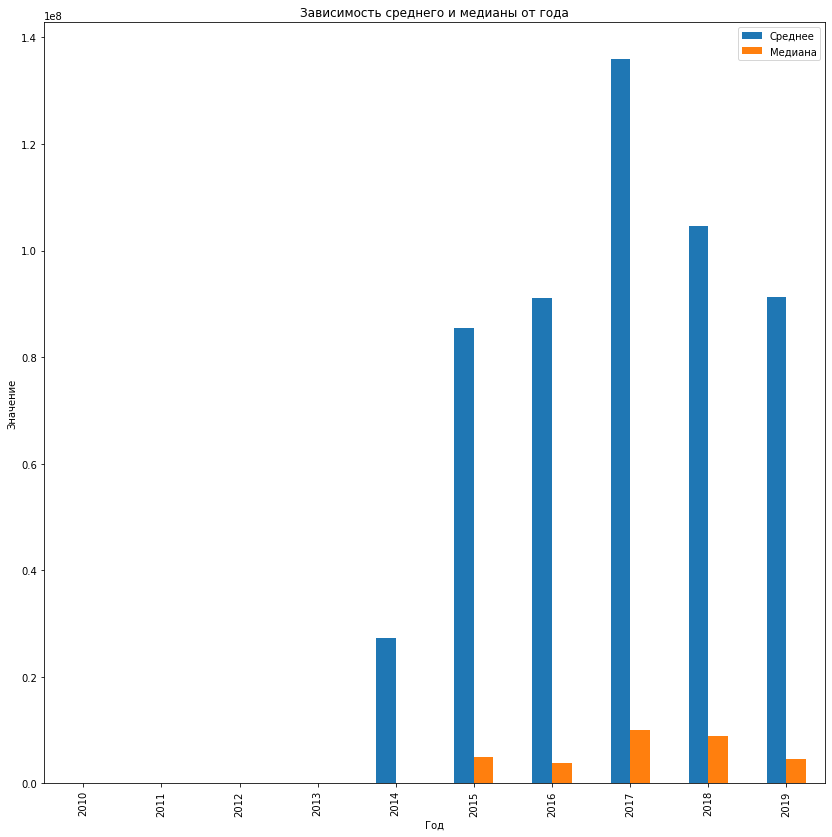

In [63]:
box_office_mean_df.plot(y=['Среднее', 'Медиана'], kind="bar", figsize=(14,14))
plt.legend()
plt.title('Зависимость среднего и медианы от года')
plt.ylabel('Значение')
plt.xlabel('Год')
plt.show()

Среднее значительно превышает медиану. Максимальные значения достигаются в 2017 году: среднее - 136 млн, медиана - 10 млн.  
Выводим подробную информацию о сборах по годам:

____________________________________________________________________________________________________

2010


count    1.010000e+02
mean     2.404608e+04
std      1.461387e+05
min      7.500000e+01
25%      4.200000e+02
50%      1.710000e+03
75%      5.830000e+03
max      1.446400e+06
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 4318    морские динозавры 3d: путешествие в доисториче...
Name: title, dtype: object


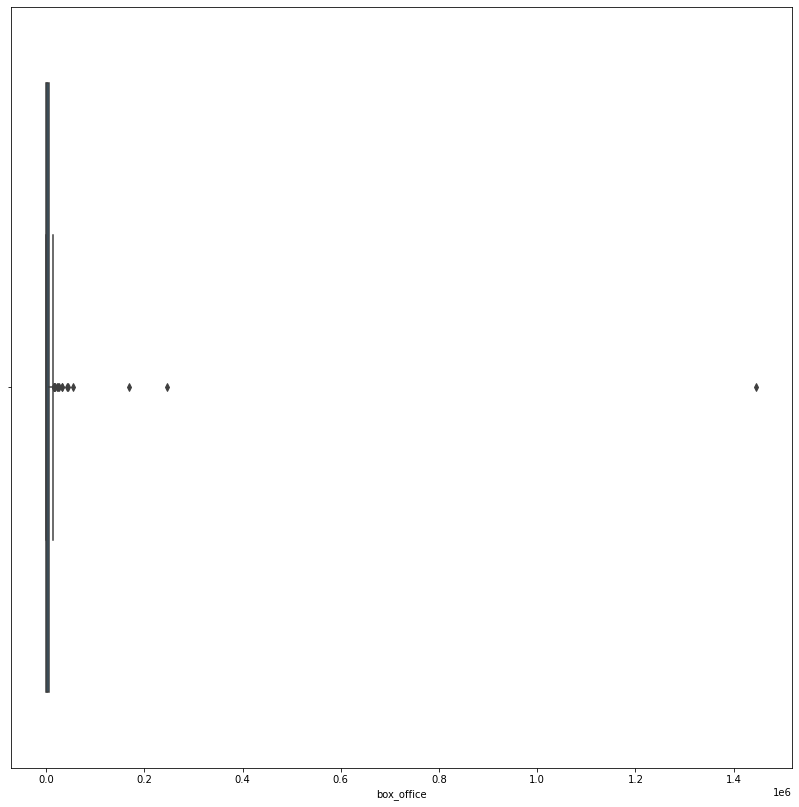

____________________________________________________________________________________________________

2011


count    1.090000e+02
mean     1.293832e+05
std      1.114447e+06
min      1.250000e+02
25%      7.650000e+02
50%      3.000000e+03
75%      9.680000e+03
max      1.161808e+07
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 5092    черные дыры: обратная сторона вселенной
Name: title, dtype: object


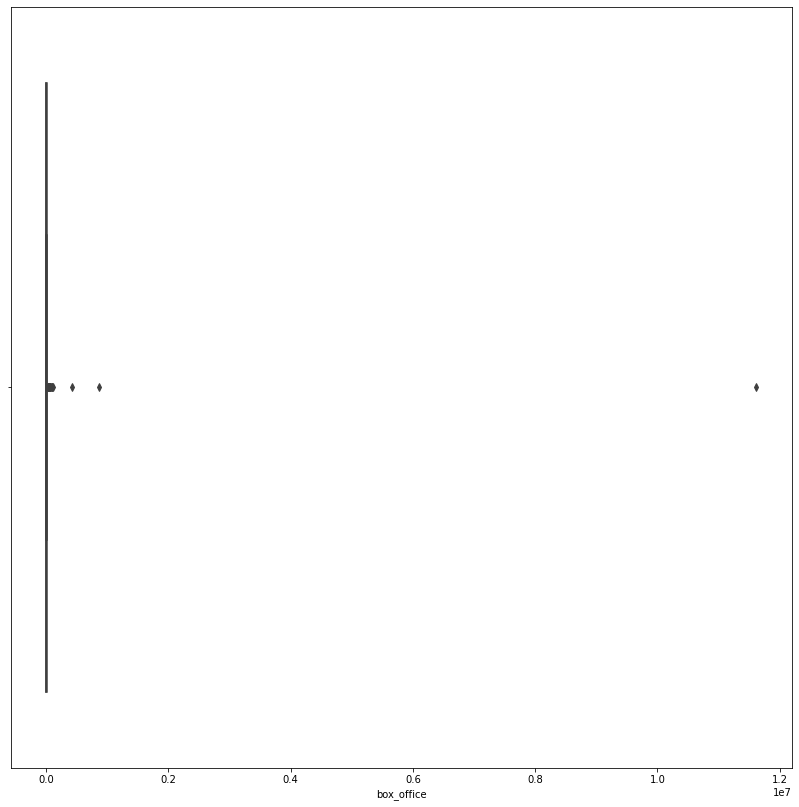

____________________________________________________________________________________________________

2012


count    1.230000e+02
mean     5.654815e+04
std      2.336668e+05
min      8.000000e+01
25%      9.300000e+02
50%      6.220000e+03
75%      2.270250e+04
max      2.311220e+06
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 664    мстители_
Name: title, dtype: object


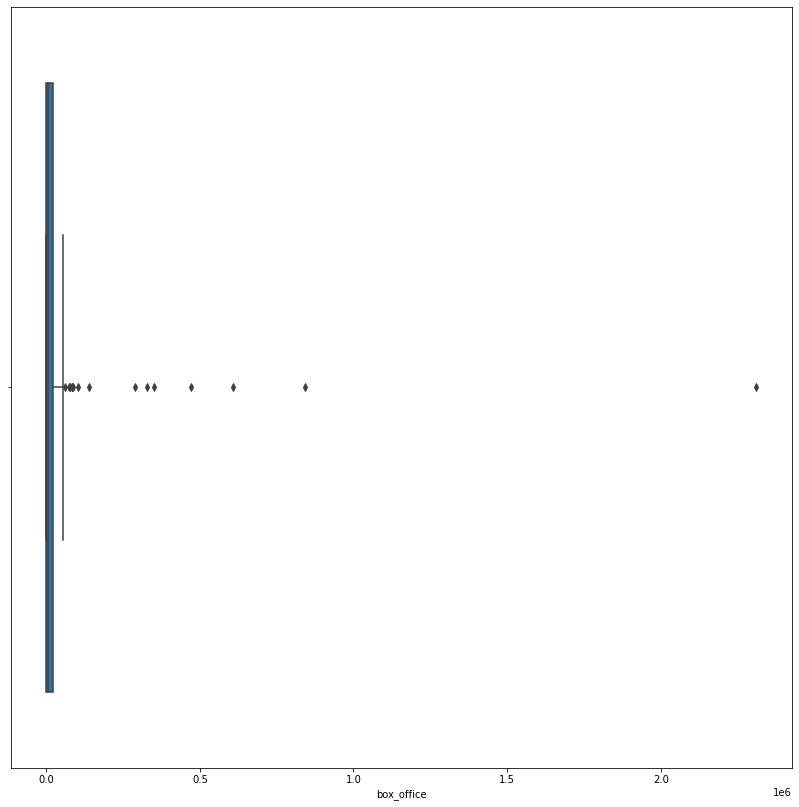

____________________________________________________________________________________________________

2013


count    1.790000e+02
mean     1.664788e+05
std      1.525590e+06
min      4.000000e+01
25%      9.500000e+02
50%      3.580000e+03
75%      1.575500e+04
max      1.995703e+07
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 1498    невидимки
Name: title, dtype: object


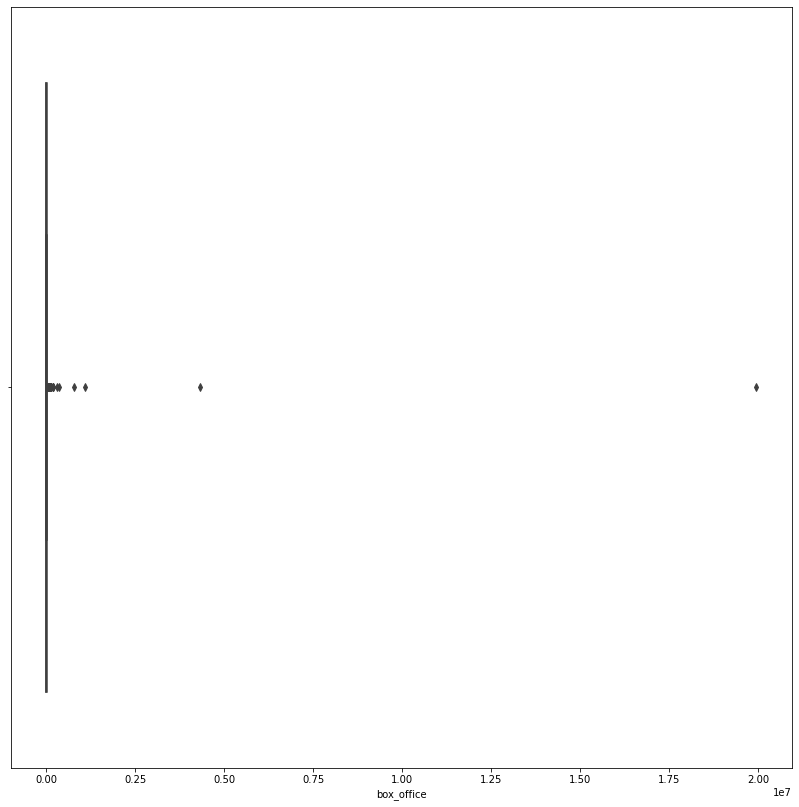

____________________________________________________________________________________________________

2014


count    2.730000e+02
mean     2.727089e+07
std      1.223247e+08
min      5.000000e+01
25%      1.825000e+03
50%      2.040000e+04
75%      6.210500e+05
max      1.016411e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 1983    седьмой сын
Name: title, dtype: object


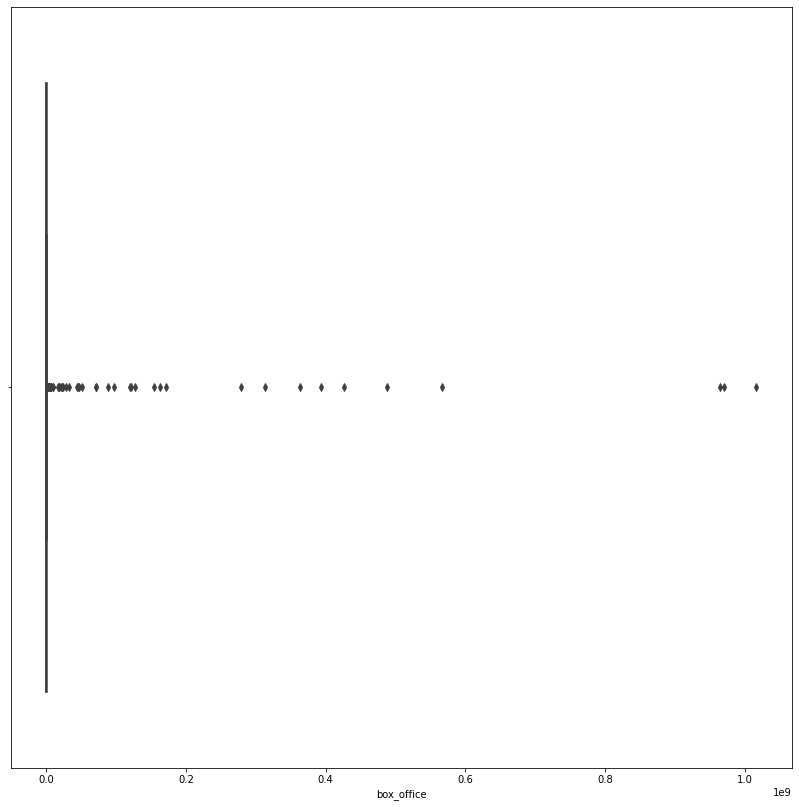

____________________________________________________________________________________________________

2015


count    4.620000e+02
mean     8.549213e+07
std      2.207714e+08
min      1.000000e+02
25%      7.841458e+05
50%      5.003450e+06
75%      4.350035e+07
max      1.658861e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 3117    звёздные войны: пробуждение силы
Name: title, dtype: object


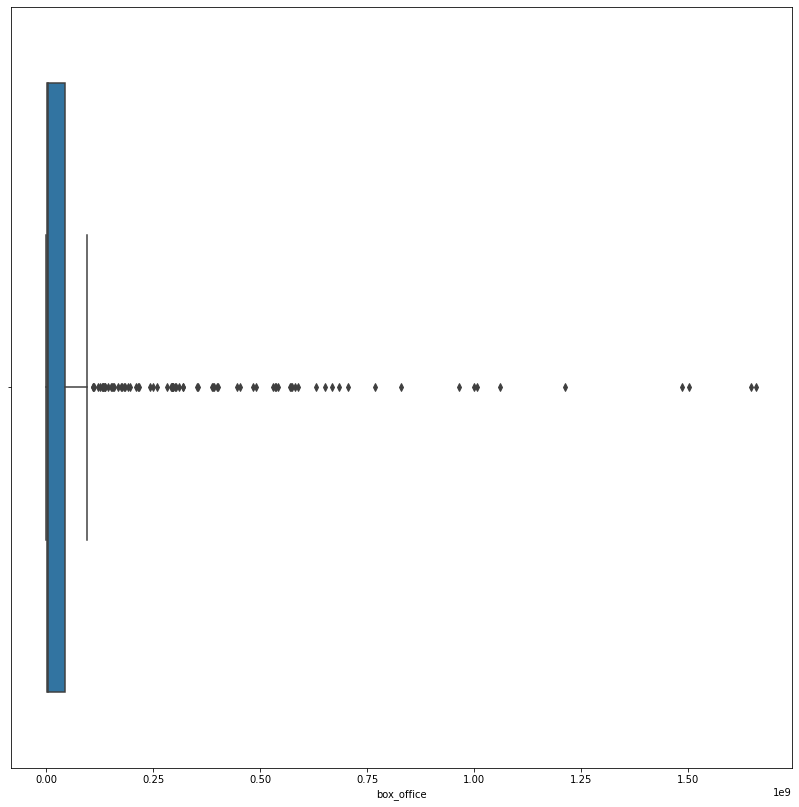

____________________________________________________________________________________________________

2016


count    5.250000e+02
mean     9.117390e+07
std      2.512522e+08
min      2.000000e+02
25%      5.963730e+05
50%      3.915041e+06
75%      3.895876e+07
max      2.048126e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 2859    зверополис
Name: title, dtype: object


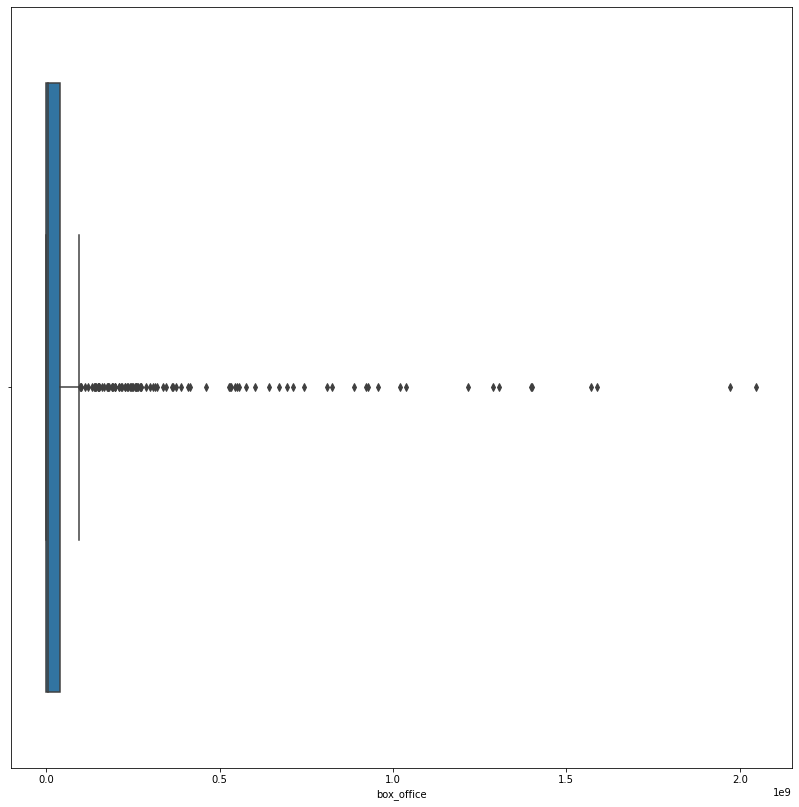

____________________________________________________________________________________________________

2017


count    3.570000e+02
mean     1.360328e+08
std      3.232514e+08
min      7.900000e+03
25%      1.951257e+06
50%      9.968340e+06
75%      7.117383e+07
max      2.779686e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 5653    движение вверх
Name: title, dtype: object


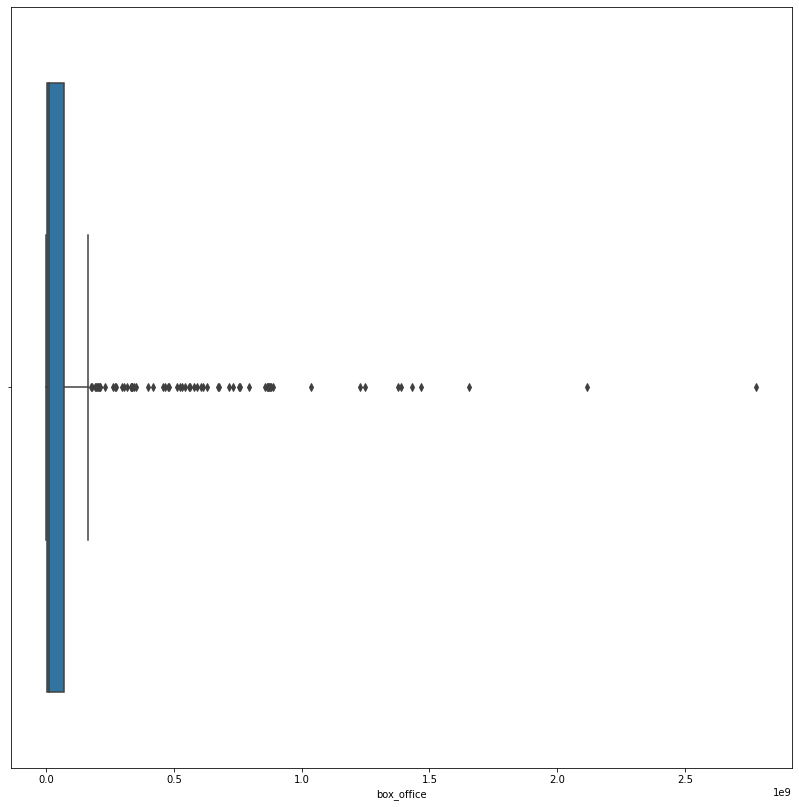

____________________________________________________________________________________________________

2018


count    4.750000e+02
mean     1.045651e+08
std      2.720790e+08
min      4.122500e+04
25%      2.388580e+06
50%      8.891102e+06
75%      6.001576e+07
max      2.271754e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 6549    т-34
Name: title, dtype: object


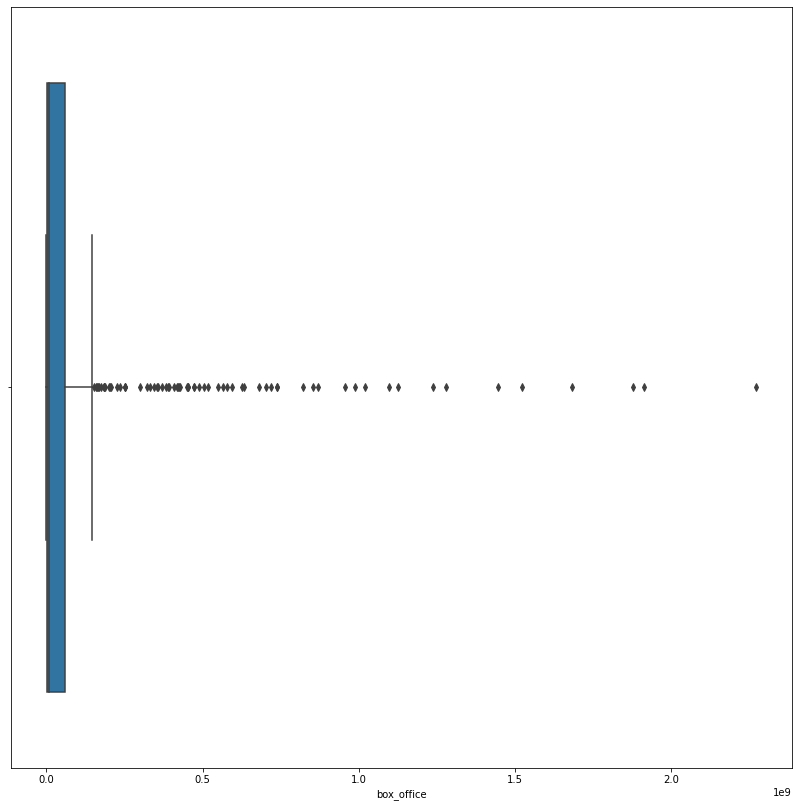

____________________________________________________________________________________________________

2019


count    5.300000e+02
mean     9.136926e+07
std      2.909312e+08
min      4.398400e+03
25%      1.386961e+06
50%      4.627798e+06
75%      3.836250e+07
max      3.073569e+09
Name: box_office, dtype: float64

Фильм с наибольшим сбором: 7456    холоп
Name: title, dtype: object


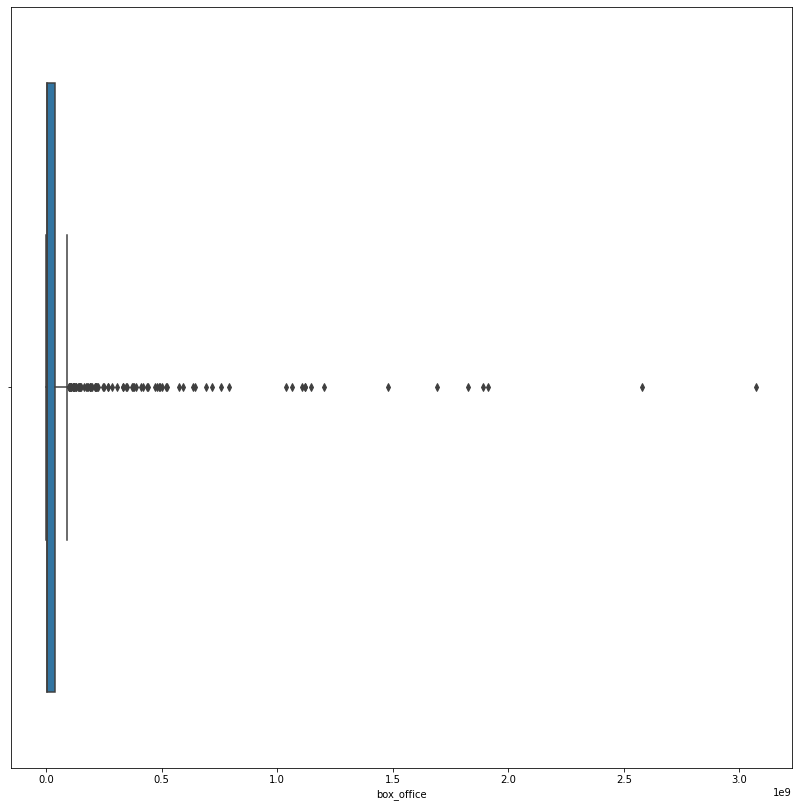

In [64]:
years = box_mean_df['year'].unique()                                    # список уникальных значений year
years.sort()                                                            # сортировка списка уникальных значений year
for i in years:                                                         # проходим по списку уникальных значений year
    box_max_df = box_mean_df.loc[box_mean_df['year'] == i]              # создаем датафрейм для каждого года
    plt.figure(figsize=(14,14))
    ax1 =sns.boxplot(data=box_max_df, x='box_office')                   # отрисовываем диаграмму размаха
    print('_' * 100)
    print()
    print(i)
    display(box_max_df['box_office'].describe().T)
    print('Фильм с наибольшим сбором: {}'.format(box_max_df.loc[box_max_df['box_office'] == box_max_df['box_office'].max(), 'title']))
    plt.show()

С течением времени увеличивается как количество фильмов, сборы которых превышают Q3+1,5*IQR, так и суммы сборов данных фильмов. Это свидетельствует, что при общем росте количества премьер появляется больше высокоприбыльных картин. Разница в сборах между "хитами" и "средними" фильмами увеличивается, отчего среднее значение смещается в большую сторону сильнее, чем медиана.

### Анализ зависимости сборов от возрастной категории
<a id="age"></a>

Определяем, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.  
Создаем таблицу, в которую включены фильмы, допущенные в прокат начиная с 2015 года и имеющие данные по сборам:

In [65]:
year_df = box_mean_df.loc[df['year'] >= 2015]

Создаем сводную таблицу распределения сборов по годам и возрастным категориям:

In [66]:
age_restriction_df = year_df.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
age_restriction_df

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


По данным сводной таблицы строим графики:

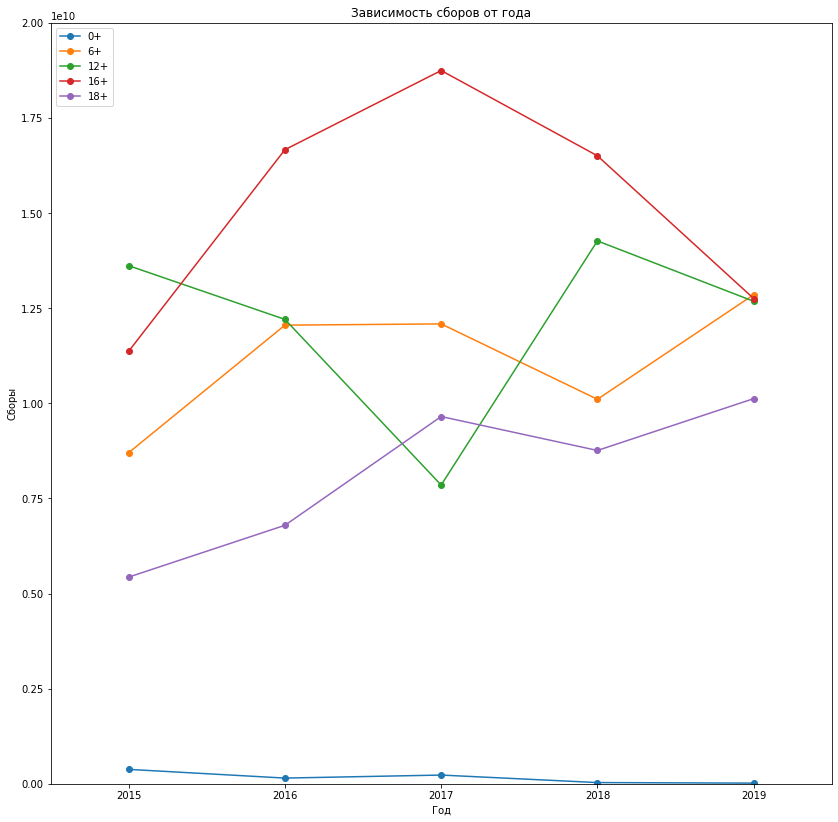

In [67]:
plt.figure(figsize=(14,14))
ax = plt.plot(age_restriction_df.index, age_restriction_df['«0+» - для любой зрительской аудитории'], marker='o')
ax = plt.plot(age_restriction_df.index, age_restriction_df['«6+» - для детей старше 6 лет'], marker='o')
ax = plt.plot(age_restriction_df.index, age_restriction_df['«12+» - для детей старше 12 лет'], marker='o')
ax = plt.plot(age_restriction_df.index, age_restriction_df['«16+» - для детей старше 16 лет'], marker='o')
ax = plt.plot(age_restriction_df.index, age_restriction_df['«18+» - запрещено для детей'], marker='o')
plt.title('Зависимость сборов от года')
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.legend(['0+', '6+', '12+', '16+', '18+'], loc=2)
plt.ylim([0, 20000000000])
plt.xlim([2014.5, 2019.5])
plt.show()

Наибольшие сборы имеют фильмы категории "16+". В 2015-2017 сборы фильмов "16+" возросли с 11,3 млрд. до 18,7 млрд., затем наблюдается падение до 12,7 млрд. в 2019 году.  
Тенденция к увеличению или уменьшению сборов фильмов категории "6+" и "12+" не наблюдается, значения колеблются в диапазоне 7,9-14,3 млрд.  
Сборы фильмов категории "18+" поступательно увеличиваются с 5,4 млрд. в 2015 году до 10,1 млрд. в 2019.  
Наименьшее количество сборов на всем временном промежутке имеют фильмы категории "0+". У них сборы колеблются в диапазоне 150-379 млн.  
Количество сборов для фильмов различных категорий соответствует [количеству премьер](#premiere_age) фильмов данных категорий. Фильмы категории "16+" имеют как наибольшее количество премьер - 2517, так и наибольшую [долю госсредств в бюджете](#budget_age) - 63,4%.  
Количество премьер фильмов категории "0+" всего 749 при минимальной среди всех категорий доле [госфинансов в бюджете](#budget_age) - 38,9%.

### Исследование фильмов, которые получили государственную поддержку
<a id="gos"></a>

Создаем таблицу "gos_df", содержащую информацию о фильмах, имеющих господдержку:

In [68]:
gos_df = df.loc[(df['refundable_support'] > 0) | (df['nonrefundable_support'] > 0)]

выводим общую информацию о таблице:

In [69]:
gos_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    uint32             
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    category           
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    category           
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

В таблице 332 строки, ее объем - 1,2 MB

Выводим первые 5 строк таблицы:

In [70]:
gos_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,one_director,one_producer,one_genres,gos_financing
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,министерство культуры,8.1,"драма,мелодрама",365353.6,2013,а.атанесян,а.атанесян,драма,0.333703
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,министерство культуры,NaN,неизвестен,28140.0,2014,а.якимчук,а.тютрюмов,неизвестен,0.700000
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,фонд кино,5.3,"комедия,фантастика",19957031.5,2013,р.давлетьяров,р.давлетьяров,комедия,0.612691
1524,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,министерство культуры,4.2,драма,55917.5,2014,е.миндадзе (псевдоним катя шагалова),л.антонова,драма,0.690095
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,министерство культуры,6.4,драма,232100.0,2014,м.угаров,а.миндадзе,драма,0.624764


Вычисляем сколько выделено возратных и невозвратных средств за весь период:

In [71]:
refundable_support_sum = gos_df['refundable_support'].sum()
nonrefundable_support_sum = gos_df['nonrefundable_support'].sum()
print('Сумма возвратных средств = {}'.format(refundable_support_sum))
print('Сумма невозвратных средств = {}'.format(nonrefundable_support_sum))
print('Госфинансирование за весь период = {}'.format(refundable_support_sum + nonrefundable_support_sum))

Сумма возвратных средств = 3939000000.0
Сумма невозвратных средств = 16261688312.0
Госфинансирование за весь период = 20200688312.0


***Корреляция госфинансирования с основными параметрами***
<a id=corr></a>

Вычисляем корреляцию госфинансирования с основными параметрами:

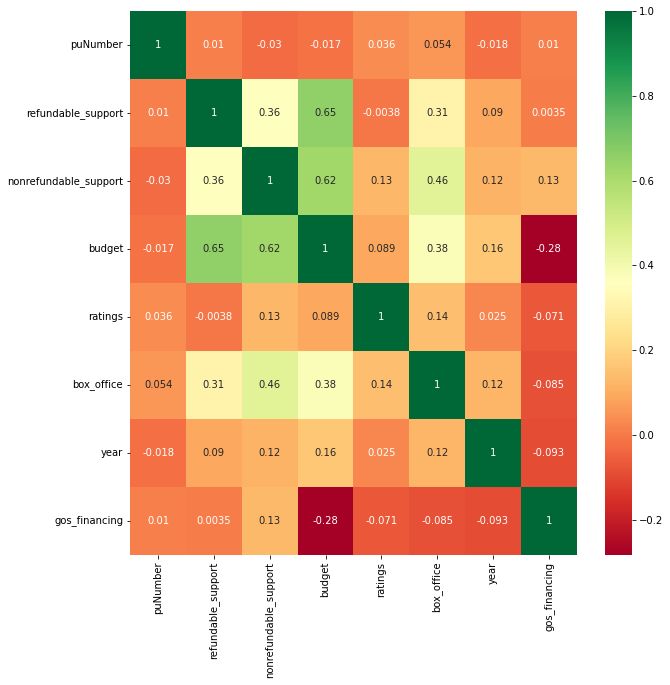

In [72]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(gos_df.corr(), annot=True, cmap='RdYlGn')
ax.figure.set_figwidth(10)
ax.figure.set_figheight(10)
plt.show()

Выявлены следующие зависимости:
- refundable_support/budget - 0,65;
- nonrefundable_support/budget - 0,62;
- nonrefundable_support/box_office - 0,46;
- budget/box_office - 0,38;
- refundable_support/nonrefundable_support - 0,36;
- refundable_support/box_office - 0,31;

С остальными параметрами величина корреляции незначительна.

При том, что абсолютные значения возвратных ("refundable_support") и невозвратных ("nonrefundable_support") средств в бюджете картины имеют средние величыны прямой корреляции со сборами, относительный их показатель в бюджете ("gos_financing") на сборы влияния не оказывают.  
Сборы прямо коррелируются с господдержкой и бюджетом. При этом большую корреляцию сборы имеют с невозвратными средствами, данная составляющая бюджета в большей степени идет на продвижение фильмов, нежели возвратная.  
На рейтинг фильма госфинансирование влияния не оказывает.

***Распределение возвратного и невозвратного госфинансирования по годам***
<a id=back_finance></a>

Создаем сводную таблицу, в которой по годам рассчитаны среднее и сумма возвратного и невозвратного госфинансирования:

In [73]:
gos_year_df = gos_df.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], aggfunc=['mean', 'sum'])
gos_year_df.columns=['Среднее возвр.', 'Среднее невозвр.', 'Сумма возвр.', 'Сумма невозвр.']
gos_year_df

,Среднее возвр.,Среднее невозвр.,Сумма возвр.,Сумма невозвр.
year,,,,
2013,6.717397e+07,0.000000e+00,1.343479e+08,0.0
2014,3.131264e+07,4.437500e+06,5.010023e+08,71000000.0
2015,3.510568e+07,7.408757e+06,3.019088e+09,637153119.0
2016,5.543698e+07,1.510656e+07,3.381655e+09,921500000.0
2017,6.011280e+07,1.754505e+07,2.464625e+09,719346881.0
2018,4.973160e+07,1.182143e+07,2.784969e+09,662000000.0
2019,5.680000e+07,1.325714e+07,3.976000e+09,928000000.0


Строим диаграмму среднего значения госфинансирования:

Создаем диаграммы:

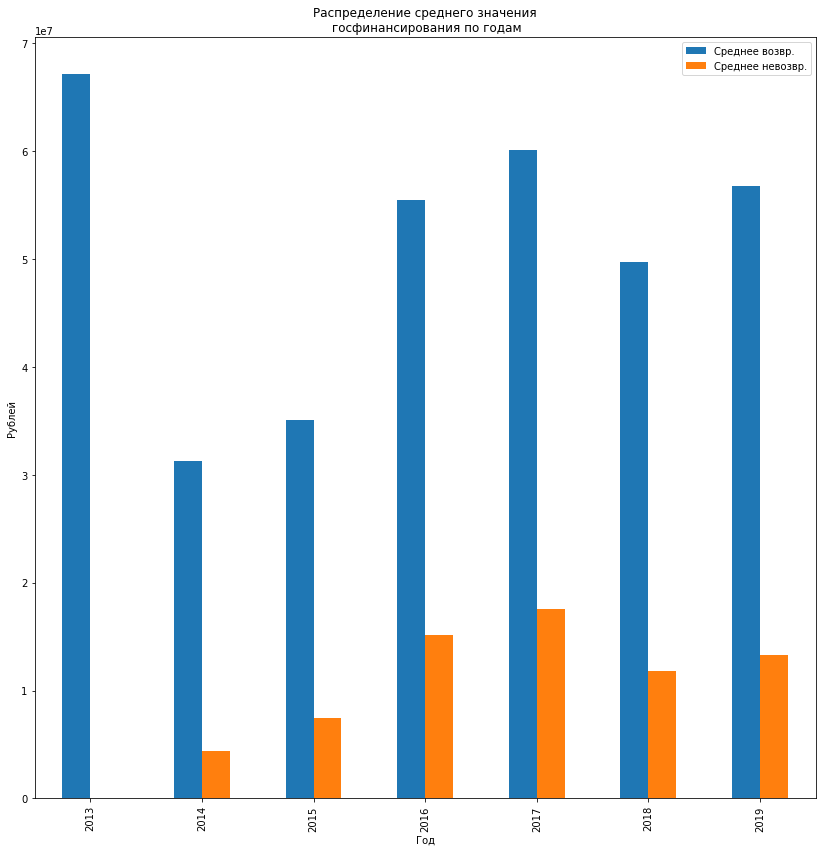

In [74]:
gos_year_df.plot(y=['Среднее возвр.', 'Среднее невозвр.'], kind="bar", figsize=(14,14))
plt.legend()
plt.title('Распределение среднего значения\n госфинансирования по годам')
plt.ylabel('Рублей')
plt.xlabel('Год')
plt.show()

Строим диаграмму госфинансирования:

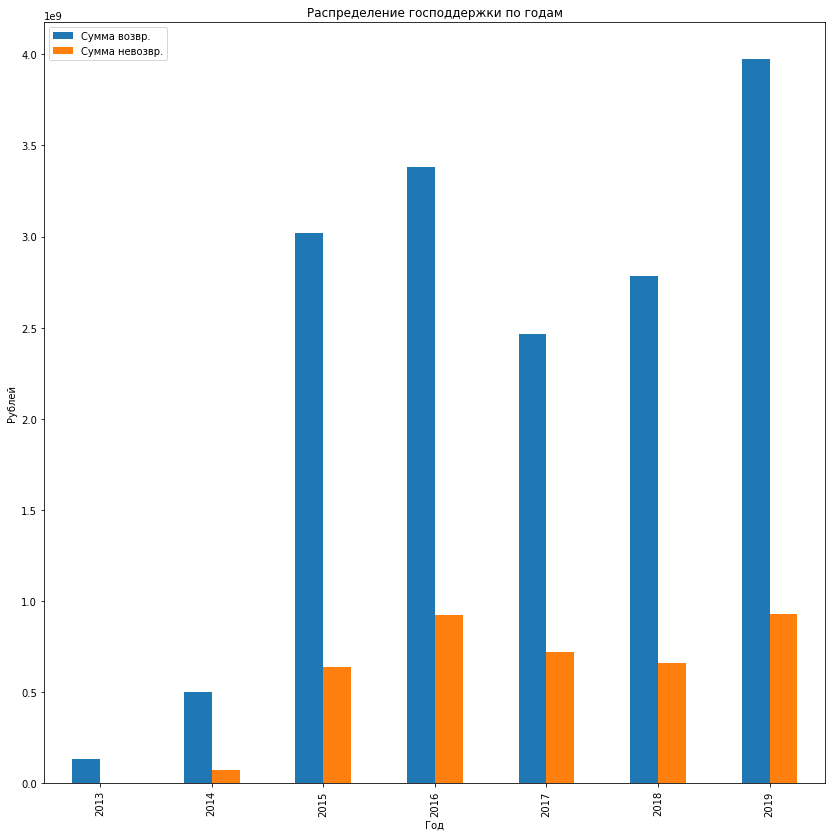

In [75]:
gos_year_df.plot(y=['Сумма возвр.', 'Сумма невозвр.'], kind="bar", figsize=(14,14))
plt.legend()
plt.title('Распределение господдержки по годам')
plt.ylabel('Рублей')
plt.xlabel('Год')
plt.show()

Наибольшее среднее значение возвратной господдержки наблюдается в 2013 году (67 млн.), при том, что абсолютное ее значение в данный год минимально (134 млн). С 2014 по 2017 среднее значение возвратных средств увеличивается с 31 млн до 60 млн и далее до 2019 года колеблется в диапазоне 50-60 млн.  
Среднее значение невозвратных средств также увеличивается с 2014 по 2017 год - с 4,4 млн до 17,5 млн. Далее к 2019 году снижается до 13,3 млн.  

Абсолютное значение возвратных средств в период 2013-2016 увеличивается со 134 млн до 3,4 млрд. В 2017 следует спад до 2,5 млрд, но в 2019 возрастает до максимального значения - 4,0 млрд.  
Абсолютное значение невозвратных средств в период 2014-2016 увеличивается с 71 млн до 719 млн. В 2017-2018 следует спад до 662 млн, но в 2019 возрастает до максимального значения - 928 млн.

В 2013 году госфинансирование на безвозвратной основе не осуществлялось.

***Доля госсредств в бюджетах фильмов по годам***
<a id=budget_year></a>

Создаем сводную таблицу, в которой по годам рассчитана медиана доли госсредств в бюджете:

In [76]:
gos_financing_year = gos_df.pivot_table(index='year', values='gos_financing', aggfunc='median')
gos_financing_year

,gos_financing
year,
2013,0.473197
2014,0.582085
2015,0.623736
2016,0.640000
2017,0.524780
2018,0.594160
2019,0.585982


Создаем диаграмму:

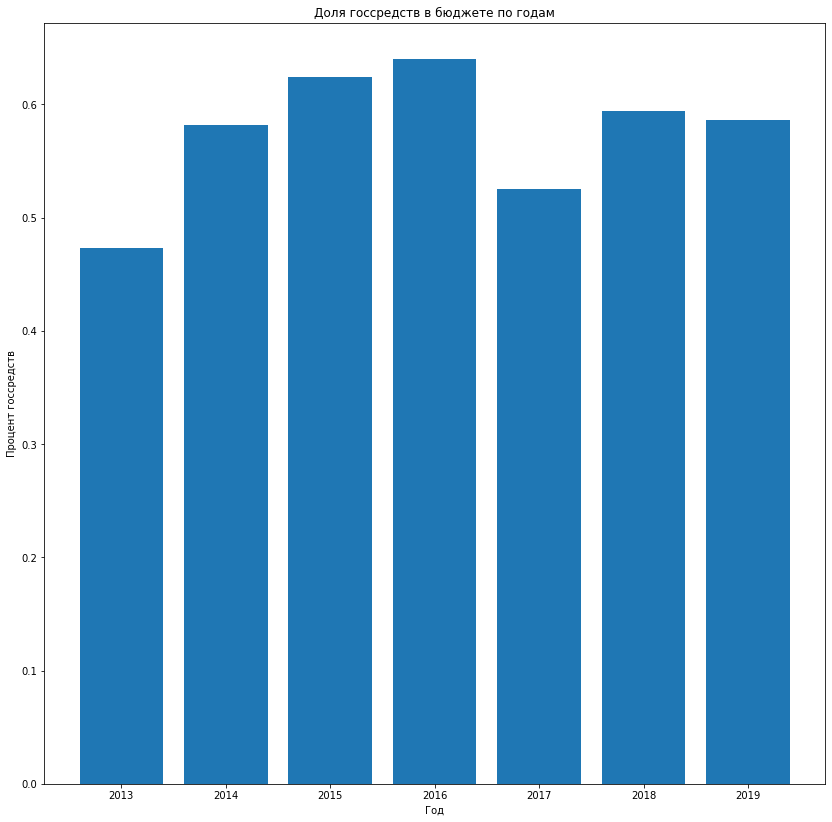

In [77]:
plt.figure(figsize=(14,14))
ax = plt.bar(gos_financing_year.index, gos_financing_year['gos_financing'])
plt.title('Доля госсредств в бюджете по годам')
plt.ylabel('Процент госсредств')
plt.xlabel('Год')
plt.show()

Наименьшая доля госфинансов в бюджетах фильмов в 2013 году - 47.3%. К 2016 году она увеличивается до 64,0%. В 2017 происходит снижение до 52,5%. В 2018 и 2019 доля госфинансов бюджетах фильмов составляет 59,4% и 58,6% соответственно.

***Доля госсредств в бюджетах фильмов по жанрам***
<a id=budget_genres></a>

Создаем сводную таблицу, в которой по жанрам рассчитана медиана доли госсредств в бюджете:

In [78]:
gos_genre = (
    gos_df.pivot_table(index='one_genres', values='gos_financing', aggfunc='median')
    .sort_values(by='gos_financing')
)
gos_genre.columns = ['Госфинансирование, %']
gos_genre

,"Госфинансирование, %"
one_genres,
биография,0.210000
военный,0.351354
история,0.385147
приключения,0.428555
мелодрама,0.440373
мультфильм,0.444444
спорт,0.500000
боевик,0.509758
фантастика,0.529661


Создаем диаграмму:

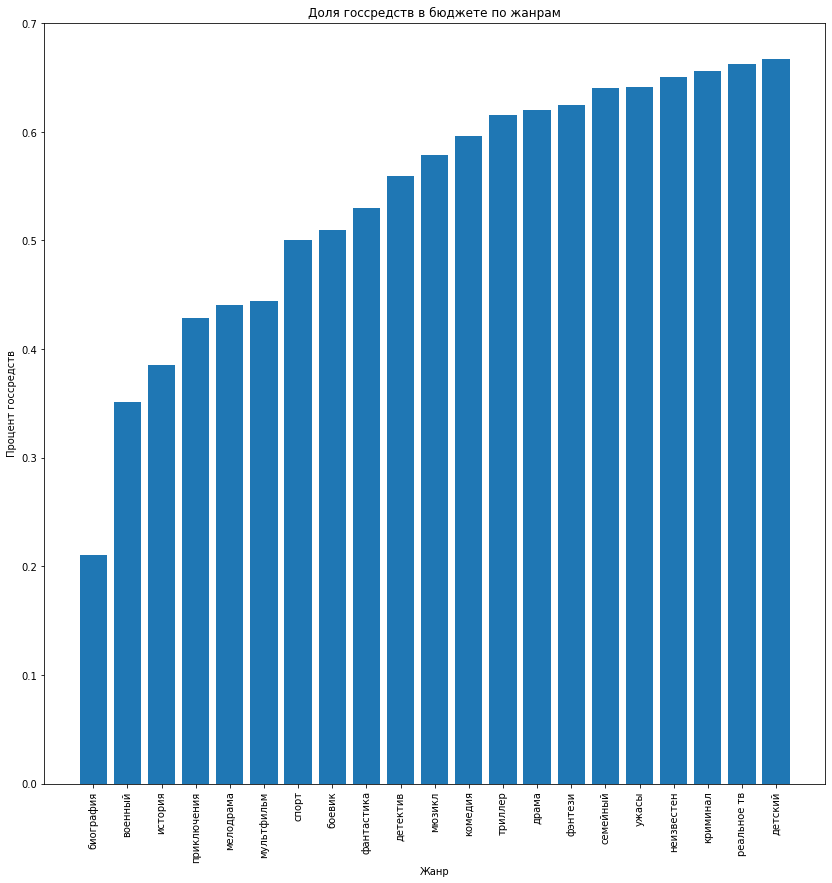

In [79]:
plt.figure(figsize=(14,14))
ax = plt.bar(gos_genre.index, gos_genre['Госфинансирование, %'])
plt.title('Доля госсредств в бюджете по жанрам')
plt.ylabel('Процент госсредств')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.show()

Классифицируем уровень господдержки жанров по квантилям:
- до Q1 - низкий уровень госфинансирования;
- Q1-Q3 - средний уровень госфинансирования;
- более Q3 - высокий уровень госфинансирования.

In [80]:
q1 = gos_genre['Госфинансирование, %'].quantile(0.25)
q3 = gos_genre['Госфинансирование, %'].quantile(0.75)
print('Низкий уровень госфинансирования.')
display(gos_genre.loc[gos_genre['Госфинансирование, %'] < q1])
print('_________________________________')
print('Средний уровень госфинансирования.')
display(gos_genre.loc[(gos_genre['Госфинансирование, %'] > q1) & (gos_genre['Госфинансирование, %'] < q3)])
print('_________________________________')
print('Высокий уровень госфинансирования.')
display(gos_genre.loc[gos_genre['Госфинансирование, %'] > q3])

Низкий уровень госфинансирования.


,"Госфинансирование, %"
one_genres,
биография,0.210000
военный,0.351354
история,0.385147
приключения,0.428555
мелодрама,0.440373


_________________________________
Средний уровень госфинансирования.


,"Госфинансирование, %"
one_genres,
спорт,0.500000
боевик,0.509758
фантастика,0.529661
детектив,0.559303
мюзикл,0.578426
комедия,0.596324
триллер,0.615751
драма,0.620361
фэнтези,0.625000


_________________________________
Высокий уровень госфинансирования.


,"Госфинансирование, %"
one_genres,
ужасы,0.641641
неизвестен,0.650000
криминал,0.656250
реальное тв,0.662500
детский,0.667229


***Доля госсредств в бюджетах фильмов по возрастной категории***
<a id=budget_age></a>

Создаем сводную таблицу, в которой по возрастной категории рассчитана медиана доли госсредств в бюджете:

In [81]:
gos_age = (
    gos_df.pivot_table(index='age_restriction', values='gos_financing', aggfunc='median')
    .sort_values(by='gos_financing')
)
gos_age.columns = ['Госфинансирование, %']
gos_age

,"Госфинансирование, %"
age_restriction,
«0+» - для любой зрительской аудитории,0.389038
«18+» - запрещено для детей,0.552580
«6+» - для детей старше 6 лет,0.559303
«12+» - для детей старше 12 лет,0.603972
«16+» - для детей старше 16 лет,0.633874


Создаем диаграмму:

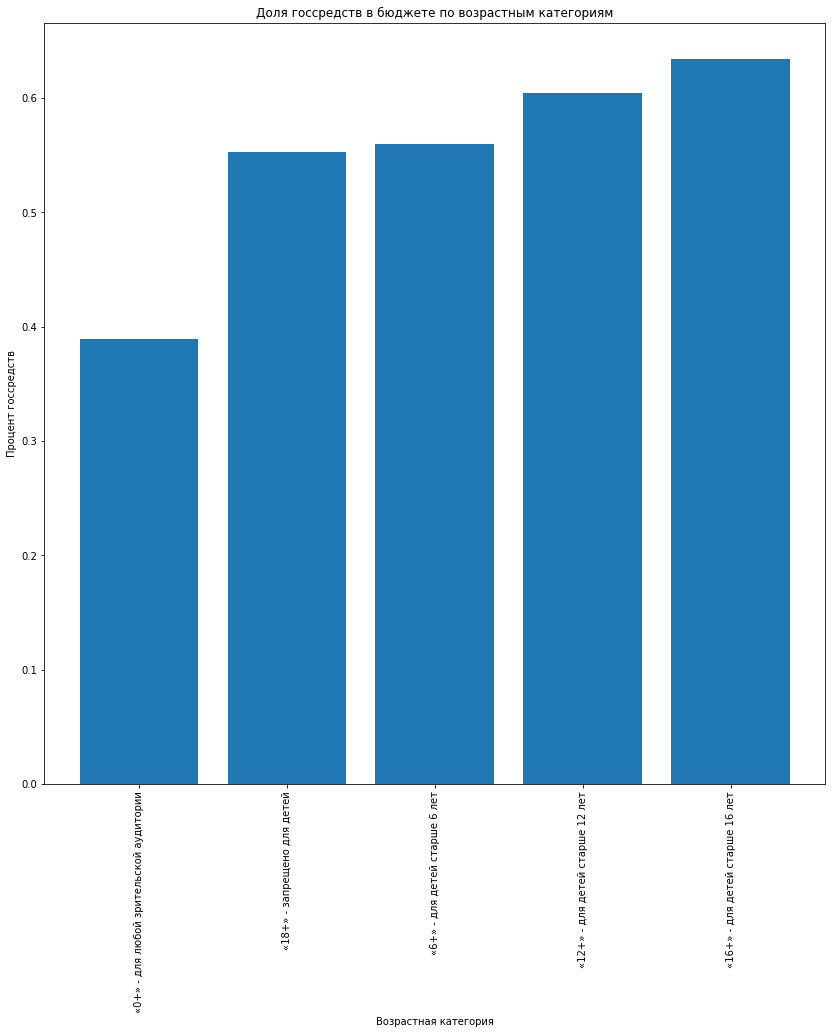

In [82]:
plt.figure(figsize=(14,14))
ax = plt.bar(gos_age.index, gos_age['Госфинансирование, %'])
plt.title('Доля госсредств в бюджете по возрастным категориям')
plt.ylabel('Процент госсредств')
plt.xlabel('Возрастная категория')
plt.xticks(rotation=90)
plt.show()

Наибольшую долю госсредств в бюджете имеют фильмы категории "16+" - 63,4%, наименьшую - "0+" - 38,9%.

***Анализ источника финансирования по годам***
<a id=finance></a>

Создаем сводную таблицу, в которой средства господдержки распределены по источникам финансирования:

In [83]:
gos_source = gos_df.pivot_table(index='year', columns='financing_source', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
gos_source.columns = ['Невозвратные, минкульт', 'Невозвратные, минкульт и фонд кино', 'Невозвратные, фонд кино',
                      'Возвратные, минкульт', 'Возвратные, минкульт и фонд кино', 'Возвратные, фонд кино']
gos_source

,"Невозвратные, минкульт","Невозвратные, минкульт и фонд кино","Невозвратные, фонд кино","Возвратные, минкульт","Возвратные, минкульт и фонд кино","Возвратные, фонд кино"
year,,,,,,
2013,2.650000e+07,0.0,1.078479e+08,0.0,0.0,0.0
2014,2.115000e+08,159502299.0,1.300000e+08,0.0,0.0,71000000.0
2015,1.100810e+09,272229055.0,1.646049e+09,0.0,47153119.0,590000000.0
2016,7.498510e+08,288200000.0,2.343604e+09,0.0,181000000.0,740500000.0
2017,3.510000e+08,50000000.0,2.063625e+09,0.0,14346881.0,705000000.0
2018,9.260000e+08,30000000.0,1.828969e+09,0.0,25000000.0,637000000.0
2019,1.471000e+09,60000000.0,2.445000e+09,0.0,58000000.0,870000000.0


Строим диаграмму для невозвратных средств:

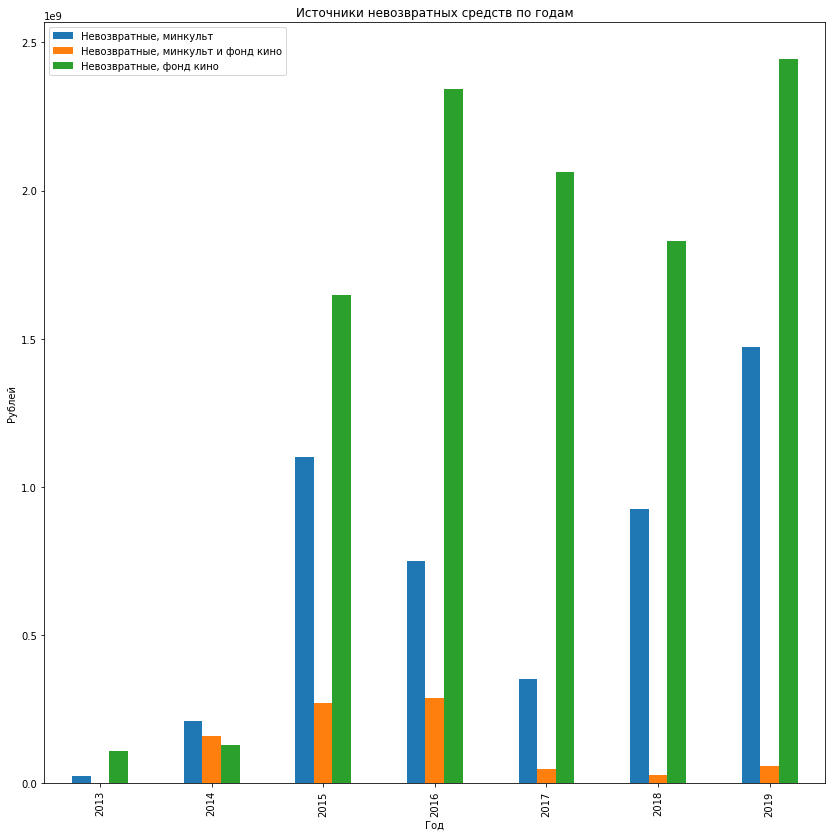

In [84]:
gos_source.plot(y=['Невозвратные, минкульт', 'Невозвратные, минкульт и фонд кино', 'Невозвратные, фонд кино'], kind="bar", figsize=(14, 14))
plt.legend()
plt.title('Источники невозвратных средств по годам')
plt.ylabel('Рублей')
plt.xlabel('Год')
plt.show()

Строим диаграмму для возвратных средств:

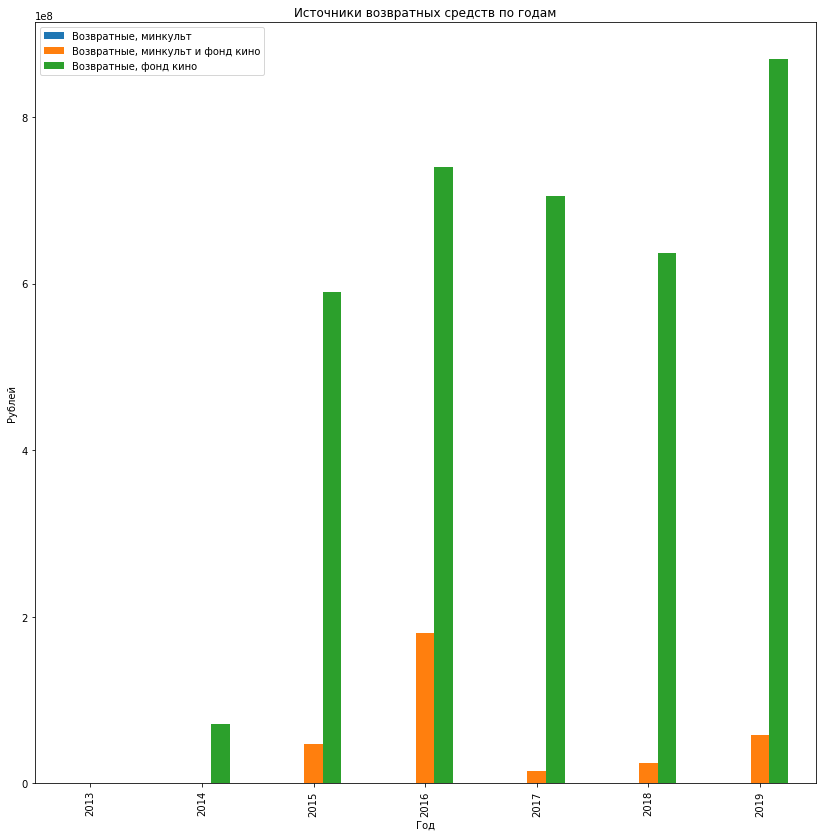

In [85]:
gos_source.plot(y=['Возвратные, минкульт', 'Возвратные, минкульт и фонд кино', 'Возвратные, фонд кино'], kind="bar", figsize=(14, 14))
plt.legend()
plt.title('Источники возвратных средств по годам')
plt.ylabel('Рублей')
plt.xlabel('Год')
plt.show()

Господдержка оказывается в основном Фондом Кино: предоставляются как возвратные, так и невозвратные средства. Максимум средств выделено в 2019 году - 2,44 млрд безвозвратных и 870 млн возвратных.  
Министерство культуры предоставляет только невозвратные средства. Максимум - 1,47 млрд в 2019 году;  
При совместном финансировании Фондом Кино и министерством культуры выделяется наименьшее количество средств. Максимально выделено в 2016 году - 282 млн невозвратных и 181 млн возвратных средств.  


***Анализ источника финансирования по жанрам***
<a id=finance_genre></a>

Создаем сводную таблицу, в которой средства господдержки распределены по жанрам:

In [86]:
gos_genre = gos_df.pivot_table(index='one_genres', columns='financing_source', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
gos_genre.columns = ['Невозвратные, минкульт', 'Невозвратные, минкульт и фонд кино', 'Невозвратные, фонд кино',
                      'Возвратные, минкульт', 'Возвратные, минкульт и фонд кино', 'Возвратные, фонд кино']
gos_genre

,"Невозвратные, минкульт","Невозвратные, минкульт и фонд кино","Невозвратные, фонд кино","Возвратные, минкульт","Возвратные, минкульт и фонд кино","Возвратные, фонд кино"
one_genres,,,,,,
аниме,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
биография,1.125100e+08,0.0,0.000000e+00,0.0,0.0,0.0
боевик,6.000000e+07,0.0,2.450000e+08,0.0,0.0,29000000.0
вестерн,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
военный,3.050000e+08,27000000.0,5.000087e+07,0.0,10000000.0,30000000.0
детектив,7.000000e+07,30000000.0,3.300000e+08,0.0,25000000.0,30000000.0
детский,1.190000e+08,0.0,0.000000e+00,0.0,0.0,0.0
для взрослых,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
документальный,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0


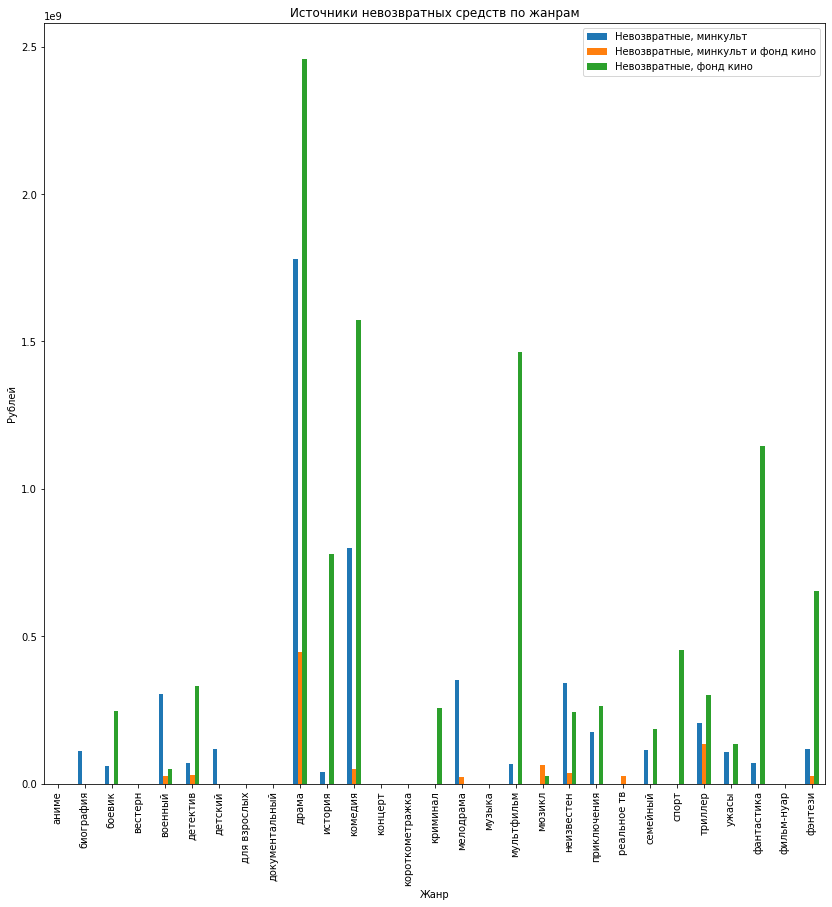

In [87]:
gos_genre.plot(y=['Невозвратные, минкульт', 'Невозвратные, минкульт и фонд кино', 'Невозвратные, фонд кино'], kind="bar", figsize=(14, 14))
plt.legend()
plt.title('Источники невозвратных средств по жанрам')
plt.ylabel('Рублей')
plt.xlabel('Жанр')

plt.show()

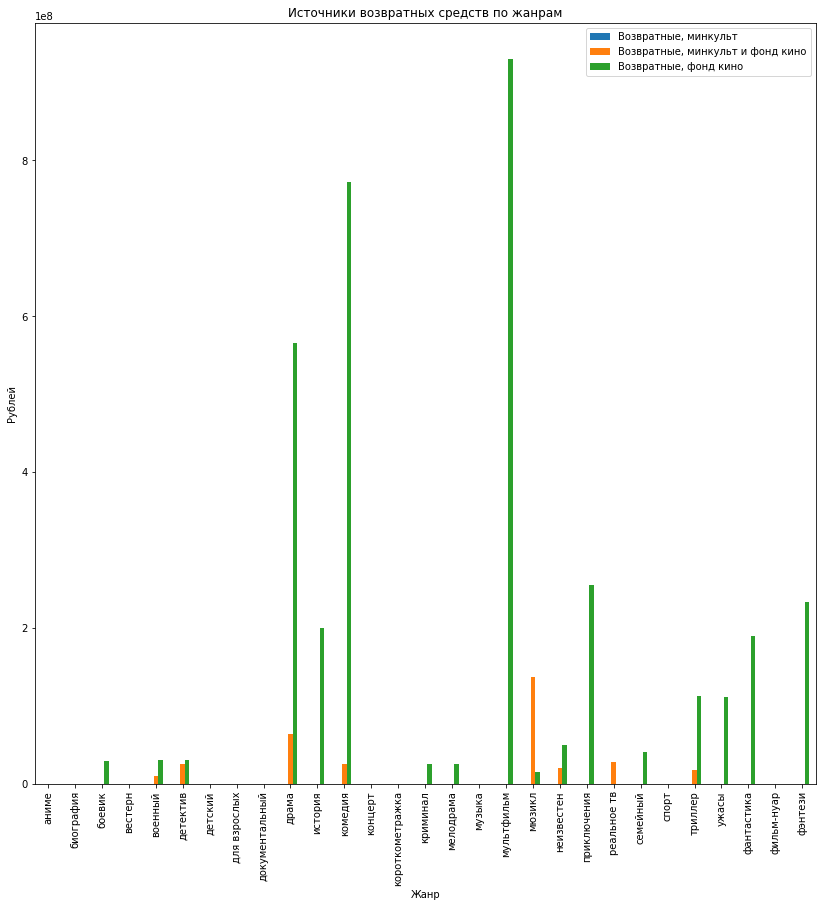

In [88]:
gos_genre.plot(y=['Возвратные, минкульт', 'Возвратные, минкульт и фонд кино', 'Возвратные, фонд кино'], kind="bar", figsize=(14, 14))
plt.legend()
plt.title('Источники возвратных средств по жанрам')
plt.ylabel('Рублей')
plt.xlabel('Жанр')
plt.show()

Министерство культуры выделяет больше всего средств на драмы (1,78 млрд), в меньшей мере - комедии (0,8 млрд). Финансирование других жанров не превышает 0,3 млрд.  

Фонд Кино выделяет на невозвратной основе больше всего средств на драмы (2,5 млрд), в меньшей мере - комедии (1,57 млрд), мультфильмы (1,47 млрд) и фантастику (1,15 млрд). Финансирование других жанров на невозвратной основе не превышает 0,78 млрд.  
На возвратной основе Фонд Кино выделяет больше всего средств на мультфильмы (0,93 млрд), в меньшей мере - комедии (0,77 млрд) и  драмы (0,57 млрд). Финансирование других жанров на возвратной основе не превышает 0,26 млрд.  

При совместном финансировании на невозвратной основе выделяется больше всего средств на драмы (0,45 млрд). Финансирование других жанров на безвозвратной основе не превышает 0,13 млрд.  
При совместном финансировании на возвратной основе выделяется больше всего средств на мюзиклы (0,14 млрд). Финансирование других жанров на возвратной основе не превышает 0,06 млрд.

***Вывод***  
<a id=final_3></a>
Количество премьер увеличивается в период 2012-2019 с 556 до 925 при значительном сокращении в 2017 до 505.  Наибольшее количество премьер наблюдается для фильмов с возрастной категорией “16+” (2517), по жанру – драма (1548).  
Рост количества премьер напрямую связан с увеличением господдержки. Увеличение количества премьер приводит к увеличению сборов в абсолютном исчислении до максимального значения в 49,6 млрд в 2018 году. Это позволяет студиям увеличивать производство фильмов и их продвижение за свой счет: с 2015 года наблюдается непропорционально большой рост сборов относительно государственной поддержки.   
Наибольшую поддержку государственные структуры оказывают фильмам с возрастным рейтингом “16+” (доля в бюджете - 63.4%), по жанрам – семейный (64%), ужасы (64.2%), криминал (65.6%), реальное ТВ (66,3%), детский (66.7%).


## Общий вывод
<a id="final"></a>

Данные исходных файлов объединены в таблицу "df". В таблице 7486 строк и 16 столбцов. Данные имеют типы "float64" и "object". Таблица имеет объем 8.9 MB.

***Предобработка данных***  
Произведена оптимизация типов данных:
- тип данных "type", "production_country", "age_restriction", "financing_source" и "genres" изменены с "object" на "categoty";
- тип данных "ratings" изменен с "object" на "float64".  

Удалена строка, в которой не указан номер прокатного удостоверения.  
Пропуски в столбце, в котором указаны страны-производители, заполнены конкретными значениями, полученными из реестра прокатных удостоверений.  
Пропуски в значениях госфинансирования и бюджета заменены на 0.  

Устранено 1390 неявных дублей в столбце "type".  
Откорректировано 17 значений "budget".  

В таблицу добавлены следующие параметры:
- "year" - год премьеры фильма;
- "one_director" - главный режиссёр;
- "one_genres" - основной жанр; 
- "gos_financing" - доля государственной поддержкой в бюджете фильма.

***Исследовательский анализ данных***

Наибольшее количество премьер было в 2010 году - 985. В течение 2011 и 2012 года наблюдается снижение до 593. С 2012 года число премьер в целом растет и к 2019 году достигает значения 930. В 2017 году наблюдается провал по количеству премьер до 505. 

До 2014 года общие сборы не превышали 29 млн.руб. В 2014 наблюдается резкий рост до 7,4 млрд., а в 2015 до 39 млрд. С 2016 по 2019 сборы колеблются в диапазоне 47,9-49,7 млрд. руб.  

Наибольшие сборы имеют фильмы категории "16+". В 2015-2017 сборы фильмов "16+" возросли с 11,3 млрд. до 18,7 млрд., затем наблюдается падение до 12,7 млрд. в 2019 году.  
Тенденция к увеличению или уменьшению сборов фильмов категории "6+" и "12+" не наблюдается, значения колеблются в диапазоне 7,9-14,3 млрд.  
Сборы фильмов категории "18+" поступательно увеличиваются с 5,4 млрд. в 2015 году до 10,1 млрд. в 2019.
Наименьшее количество сборов на всем временном промежутке имеют фильмы категории "0+". У них сборы колеблются в диапазоне 150-379 млн.

Госфинансирование.  
Сумма предоставленных возвратных средств за период 2013-2019 год = 3,94 млрд. руб.  
Сумма предоставленных невозвратных средств за период 2013-2019 год = 16,26 млрд. руб.  
Суммарное госфинансирование за период 2013-2019 год = 20,20 млрд. руб.  

Выявлены следующие зависимости:

- refundable_support/budget - 0,65;
- nonrefundable_support/budget - 0,62;
- nonrefundable_support/box_office - 0,46;
- budget/box_office - 0,38;
- refundable_support/nonrefundable_support - 0,36;
- refundable_support/box_office - 0,31;

С остальными параметрами величина корреляции незначительна.

При том, что абсолютные значения возвратных ("refundable_support") и невозвратных ("nonrefundable_support") средств в бюджете картины имеют средние величыны прямой корреляции со сборами, относительный их показатель в бюджете ("gos_financing") на сборы влияния не оказывают.  
Сборы прямо коррелируются с господдержкой и бюджетом. При этом большую корреляцию сборы имеют с невозвратными средствами, данная составляющая бюджета в большей степени идет на продвижение фильмов, нежели возвратная.  
На рейтинг фильма госфинансирование влияния не оказывает.    

Наибольшее среднее значение возвратной господдержки наблюдается в 2013 году (67 млн.), при том, что абсолютное ее значение в данный год минимально (134 млн). С 2014 по 2017 среднее значение возвратных средств увеличивается с 31 млн до 60 млн и далее до 2019 года колеблется в диапазоне 50-60 млн.
Среднее значение невозвратных средств также увеличивается с 2014 по 2017 год - с 4,4 млн до 17,5 млн. Далее к 2019 году снижается до 13,3 млн.  
Абсолютное значение возвратных средств в период 2013-2016 увеличивается со 134 млн до 3,4 млрд. В 2017 следует спад до 2,5 млрд, но в 2019 возрастает до максимального значения - 4,0 млрд.
Абсолютное значение невозвратных средств в период 2014-2016 увеличивается с 71 млн до 719 млн. В 2017-2018 следует спад до 662 млн, но в 2019 возрастает до максимального значения - 928 млн.  
В 2013 году госфинансирование на безвозвратной основе не осуществлялось.  

Наименьшая доля госфинансов в бюджетах фильмов в 2013 году - 47.3%. К 2016 году она увеличивается до 64,0%. В 2017 происходит снижение до 52,5%. В 2018 и 2019 доля госфинансов бюджетах фильмов составляет 59,4% и 58,6% соответственно.  
По доли госфинансов в бюджете картины жанры можно разделить на три группы:
1. Низкий уровень госфинансирования:
- биография (21.0%)
- военный (35.1%)
- история (38.5%)
- приключения (42.9%)
- мелодрама (44.0%)

2. Средний уровень госфинансирования:
- мультфильм (44.4%)
- спорт (50.0%)
- боевик (51.0%)
- фантастика (53.0%)
- детектив (55.9%)
- мюзикл (57.8%)
- комедия (59.6%)
- триллер (61.6%)
- драма (62.0%)
- фэнтези (62.5%)

3. Высокий уровень госфинансирования:
- семейный (64.0%)
- ужасы (64.2%)
- криминал (65.6%)
- реальное ТВ (66.3%)
- детский (66.7%)

Господдержка оказывается в основном Фондом Кино: предоставляются как возвратные, так и невозвратные средства. Максимум средств выделено в 2019 году - 2,44 млрд безвозвратных и 870 млн возвратных.  
Министерство культуры предоставляет только невозвратные средства. Максимум - 1,47 млрд в 2019 году;  
При совместном финансировании Фондом Кино и министерством культуры выделяется наименьшее количество средств.   Максимально выделено в 2016 году - 282 млн невозвратных и 181 млн возвратных средств.